In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [4]:
# Paths to uploaded files
coffee_file_path = 'COFFEE.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv'
weather_file1_path = 'brazil 2020-01-01 to 2022-06-30.csv'
weather_file2_path = 'brazil 2022-07-01 to 2024-11-12.csv'

# Loading Coffee Price Data
coffee_df = pd.read_csv(coffee_file_path)

In [5]:
# Clean the 'Local time' column and preprocess
coffee_df['Local time'] = coffee_df['Local time'].str.replace(r' GMT[+-]\d{4}', '', regex=True)
coffee_df['Local time'] = pd.to_datetime(coffee_df['Local time'], format="%d.%m.%Y %H:%M:%S.%f")
coffee_df.set_index('Local time', inplace=True)
coffee_df.index = coffee_df.index.tz_localize('America/New_York', ambiguous='infer')

# Resample hourly data to daily aggregates
coffee_daily = coffee_df.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})
coffee_daily

,Open,High,Low,Close,Volume
Local time,,,,,
2020-01-01 00:00:00-05:00,129.014,129.014,129.014,129.014,0.0000
2020-01-02 00:00:00-05:00,129.014,130.741,126.331,126.982,415.2394
2020-01-03 00:00:00-05:00,126.982,128.270,125.272,126.640,322.5946
2020-01-04 00:00:00-05:00,126.640,126.640,126.640,126.640,0.0000
2020-01-05 00:00:00-05:00,126.640,126.640,126.640,126.640,0.0000
...,...,...,...,...,...
2024-08-27 00:00:00-04:00,246.158,259.238,246.158,255.499,692.3450
2024-08-28 00:00:00-04:00,255.499,257.599,250.951,256.759,502.0750
2024-08-29 00:00:00-04:00,256.759,257.148,243.789,248.531,574.2950


In [6]:
# Loading Weather Data
weather_df1 = pd.read_csv(weather_file1_path)
weather_df2 = pd.read_csv(weather_file2_path)
weather_df = pd.concat([weather_df1, weather_df2])

In [7]:
# Preprocess Weather Data
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], format="%Y-%m-%d")
weather_df['datetime'] = weather_df['datetime'].dt.tz_localize('America/New_York')
weather_df.set_index('datetime', inplace=True)
weather_df

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00-05:00,brazil,24.7,19.1,21.5,24.7,19.1,21.5,17.9,80.9,17.0,100,4.17,rain,0,0,33.8,11.5,327.1,1012.3,62.0,10.6,255.5,22.1,9,NaN,2020-01-01T05:43:43,2020-01-01T18:46:26,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"86715099999,SBBR,83378099999,86716099999,86736..."
2020-01-02 00:00:00-05:00,brazil,26.6,18.2,22.2,26.6,18.2,22.2,18.3,79.9,0.0,0,0.00,NaN,0,0,35.3,13.4,316.0,1012.3,72.1,10.4,190.0,16.4,8,NaN,2020-01-02T05:44:18,2020-01-02T18:46:47,0.24,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83378099999,86716099999,86736..."
2020-01-03 00:00:00-05:00,brazil,27.6,18.7,21.8,28.5,18.7,21.8,18.4,82.3,4.0,100,4.17,rain,0,0,40.0,14.5,314.0,1012.7,77.4,10.9,234.6,20.4,8,NaN,2020-01-03T05:44:54,2020-01-03T18:47:07,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"86715099999,SBBR,83378099999,86716099999,86736..."
2020-01-04 00:00:00-05:00,brazil,25.1,19.2,20.6,25.1,19.2,20.6,18.7,89.3,8.0,100,8.33,rain,0,0,42.5,22.3,325.8,1012.6,73.8,8.8,158.9,13.8,6,NaN,2020-01-04T05:45:29,2020-01-04T18:47:26,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"86715099999,SBBR,83378099999,86716099999,86736..."
2020-01-05 00:00:00-05:00,brazil,22.1,17.7,19.2,22.1,17.7,19.2,18.2,93.9,44.0,100,16.67,rain,0,0,34.9,12.6,329.6,1013.0,70.0,7.0,116.3,10.1,4,NaN,2020-01-05T05:46:05,2020-01-05T18:47:44,0.33,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"86715099999,SBBR,83378099999,86716099999,86736..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08 00:00:00-05:00,brazil,25.0,19.0,21.3,25.0,19.0,21.3,18.8,86.6,4.1,100,50.00,rain,0,0,34.2,27.7,336.8,1015.5,83.0,9.6,199.5,17.4,10,10.0,2024-11-08T05:32:22,2024-11-08T18:18:51,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,SBBR
2024-11-09 00:00:00-05:00,brazil,28.0,20.0,21.7,29.6,20.0,21.7,19.3,87.2,5.0,100,45.83,rain,0,0,27.7,33.5,311.9,1016.3,82.0,10.0,268.3,22.9,10,10.0,2024-11-09T05:32:06,2024-11-09T18:19:18,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,SBBR
2024-11-10 00:00:00-05:00,brazil,29.0,19.0,23.5,30.2,19.0,23.8,18.8,77.1,10.4,100,54.17,rain,0,0,13.7,20.5,247.9,1015.0,80.5,9.9,281.7,24.5,10,10.0,2024-11-10T05:31:51,2024-11-10T18:19:45,0.32,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,SBBR


In [8]:
# Merge Coffee and Weather Data
combined_df = pd.merge(coffee_daily, weather_df, left_index=True, right_index=True, how='inner')

# Verify merged dataframe
combined_df

,Open,High,Low,Close,Volume,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
2020-01-01 00:00:00-05:00,129.014,129.014,129.014,129.014,0.0000,brazil,24.7,19.1,21.5,24.7,19.1,21.5,17.9,80.9,17.0,100,4.17,rain,0,0,33.8,11.5,327.1,1012.3,62.0,10.6,255.5,22.1,9,NaN,2020-01-01T05:43:43,2020-01-01T18:46:26,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"86715099999,SBBR,83378099999,86716099999,86736..."
2020-01-02 00:00:00-05:00,129.014,130.741,126.331,126.982,415.2394,brazil,26.6,18.2,22.2,26.6,18.2,22.2,18.3,79.9,0.0,0,0.00,NaN,0,0,35.3,13.4,316.0,1012.3,72.1,10.4,190.0,16.4,8,NaN,2020-01-02T05:44:18,2020-01-02T18:46:47,0.24,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83378099999,86716099999,86736..."
2020-01-03 00:00:00-05:00,126.982,128.270,125.272,126.640,322.5946,brazil,27.6,18.7,21.8,28.5,18.7,21.8,18.4,82.3,4.0,100,4.17,rain,0,0,40.0,14.5,314.0,1012.7,77.4,10.9,234.6,20.4,8,NaN,2020-01-03T05:44:54,2020-01-03T18:47:07,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"86715099999,SBBR,83378099999,86716099999,86736..."
2020-01-04 00:00:00-05:00,126.640,126.640,126.640,126.640,0.0000,brazil,25.1,19.2,20.6,25.1,19.2,20.6,18.7,89.3,8.0,100,8.33,rain,0,0,42.5,22.3,325.8,1012.6,73.8,8.8,158.9,13.8,6,NaN,2020-01-04T05:45:29,2020-01-04T18:47:26,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"86715099999,SBBR,83378099999,86716099999,86736..."
2020-01-05 00:00:00-05:00,126.640,126.640,126.640,126.640,0.0000,brazil,22.1,17.7,19.2,22.1,17.7,19.2,18.2,93.9,44.0,100,16.67,rain,0,0,34.9,12.6,329.6,1013.0,70.0,7.0,116.3,10.1,4,NaN,2020-01-05T05:46:05,2020-01-05T18:47:44,0.33,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"86715099999,SBBR,83378099999,86716099999,86736..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-27 00:00:00-04:00,246.158,259.238,246.158,255.499,692.3450,brazil,28.6,15.2,22.1,27.5,15.2,21.9,10.2,49.7,0.0,0,0.00,NaN,0,0,29.9,13.7,135.3,1019.7,3.7,8.5,278.8,24.1,9,10.0,2024-08-27T06:20:49,2024-08-27T18:05:38,0.77,Clear,Clear conditions throughout the day.,clear-day,"86715099999,SBBR,83378099999,86716099999,86736..."
2024-08-28 00:00:00-04:00,255.499,257.599,250.951,256.759,502.0750,brazil,27.7,17.1,22.4,26.8,17.1,22.3,11.0,49.8,0.0,0,0.00,NaN,0,0,42.5,18.8,97.2,1020.7,20.1,10.7,279.2,24.1,9,10.0,2024-08-28T06:20:07,2024-08-28T18:05:44,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83378099999,86716099999,86736..."
2024-08-29 00:00:00-04:00,256.759,257.148,243.789,248.531,574.2950,brazil,27.6,15.6,21.3,26.9,15.6,21.3,10.8,53.4,0.0,0,0.00,NaN,0,0,41.4,17.0,92.5,1021.8,13.4,10.9,282.4,24.3,10,10.0,2024-08-29T06:19:25,2024-08-29T18:05:51,0.84,Clear,Clear conditions throughout the day.,clear-day,"86715099999,SBBR,83378099999,86716099999,86736..."
2024-08-30 00:00:00-04:00,248.531,251.856,242.500,243.157,664.6600,brazil,27.7,15.2,21.4,26.8,15.2,21.3,8.8,46.8,0.0,0,0.00,NaN,0,0,43.6,17.7,97.1,1020.7,8.4,10.9,287.4,24.8,10,10.0,2024-08-30T06:18:41,2024-08-30T18:05:57,0.88,Clear,Clear conditions throughout the day.,clear-day,"86715099999,SBBR,83378099999,86716099999,86736..."


In [9]:
import pandas as pd
import numpy as np

def calculate_volatility(data, annualize=True, trading_days=252):
    # Calculate daily returns if not already provided
    if 'Returns' not in data.columns:
        data['Returns'] = data['Close'].pct_change()
    
    # Calculate standard deviation of returns
    daily_volatility = data['Returns'].std()
    
    # Annualize volatility if required
    if annualize:
        return daily_volatility * np.sqrt(trading_days)
    else:
        return daily_volatility

# Example usage
asset_volatility = calculate_volatility(combined_df)
print(f"Asset Volatility (Annualized): {asset_volatility:.4f}")


Asset Volatility (Annualized): 0.2875


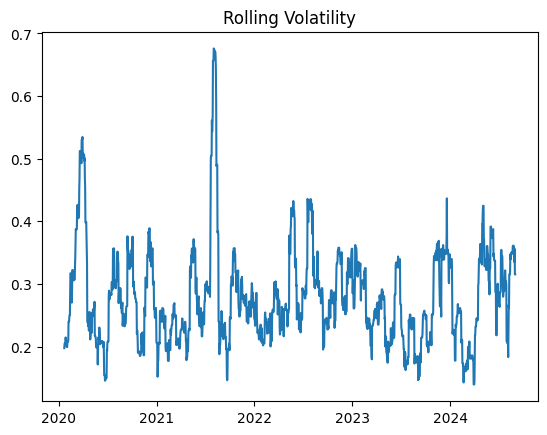

In [10]:
combined_df['Rolling_Volatility'] = combined_df['Returns'].rolling(window=21).std() * np.sqrt(252)
plt.plot(combined_df['Rolling_Volatility'])
plt.title("Rolling Volatility")
plt.show()

In [11]:
# Split data into training and testing sets
train_data = combined_df[combined_df.index < '2023-09-01']
train_data

,Open,High,Low,Close,Volume,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Returns,Rolling_Volatility
2020-01-01 00:00:00-05:00,129.014,129.014,129.014,129.014,0.0000,brazil,24.7,19.1,21.5,24.7,19.1,21.5,17.9,80.9,17.0,100,4.17,rain,0,0,33.8,11.5,327.1,1012.3,62.0,10.6,255.5,22.1,9,NaN,2020-01-01T05:43:43,2020-01-01T18:46:26,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"86715099999,SBBR,83378099999,86716099999,86736...",NaN,NaN
2020-01-02 00:00:00-05:00,129.014,130.741,126.331,126.982,415.2394,brazil,26.6,18.2,22.2,26.6,18.2,22.2,18.3,79.9,0.0,0,0.00,NaN,0,0,35.3,13.4,316.0,1012.3,72.1,10.4,190.0,16.4,8,NaN,2020-01-02T05:44:18,2020-01-02T18:46:47,0.24,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83378099999,86716099999,86736...",-0.015750,NaN
2020-01-03 00:00:00-05:00,126.982,128.270,125.272,126.640,322.5946,brazil,27.6,18.7,21.8,28.5,18.7,21.8,18.4,82.3,4.0,100,4.17,rain,0,0,40.0,14.5,314.0,1012.7,77.4,10.9,234.6,20.4,8,NaN,2020-01-03T05:44:54,2020-01-03T18:47:07,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"86715099999,SBBR,83378099999,86716099999,86736...",-0.002693,NaN
2020-01-04 00:00:00-05:00,126.640,126.640,126.640,126.640,0.0000,brazil,25.1,19.2,20.6,25.1,19.2,20.6,18.7,89.3,8.0,100,8.33,rain,0,0,42.5,22.3,325.8,1012.6,73.8,8.8,158.9,13.8,6,NaN,2020-01-04T05:45:29,2020-01-04T18:47:26,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"86715099999,SBBR,83378099999,86716099999,86736...",0.000000,NaN
2020-01-05 00:00:00-05:00,126.640,126.640,126.640,126.640,0.0000,brazil,22.1,17.7,19.2,22.1,17.7,19.2,18.2,93.9,44.0,100,16.67,rain,0,0,34.9,12.6,329.6,1013.0,70.0,7.0,116.3,10.1,4,NaN,2020-01-05T05:46:05,2020-01-05T18:47:44,0.33,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"86715099999,SBBR,83378099999,86716099999,86736...",0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27 00:00:00-04:00,151.811,151.811,151.811,151.811,0.0000,brazil,28.6,18.6,22.4,28.6,18.6,22.4,16.3,70.4,1.7,100,8.33,rain,0,0,33.5,12.3,319.1,1015.0,76.1,11.2,217.3,18.8,9,10.0,2023-08-27T06:21:20,2023-08-27T18:05:32,0.38,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"86715099999,83379099999,SBBR,83377099999,83378...",0.000000,0.178878
2023-08-28 00:00:00-04:00,151.811,154.689,151.811,152.734,230.0875,brazil,24.3,18.6,20.8,24.3,18.6,20.8,17.8,83.4,8.0,100,8.33,rain,0,0,10.8,10.1,139.7,1017.1,75.3,10.4,175.5,15.1,6,10.0,2023-08-28T06:20:39,2023-08-28T18:05:38,0.42,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"86715099999,SBBR,83377099999,83378099999,86716...",0.006080,0.175560
2023-08-29 00:00:00-04:00,152.734,154.311,151.453,153.060,378.5350,brazil,28.2,19.1,22.0,28.4,19.1,22.0,17.5,77.2,0.1,100,4.17,rain,0,0,21.2,10.8,85.7,1017.3,74.2,9.8,192.8,16.7,9,10.0,2023-08-29T06:19:56,2023-08-29T18:05:45,0.45,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"86715099999,83379099999,SBBR,83377099999,83378...",0.002134,0.174295
2023-08-30 00:00:00-04:00,153.060,155.708,153.060,155.083,388.8800,brazil,25.7,18.1,21.3,25.7,18.1,21.3,16.8,77.4,25.0,100,4.17,rain,0,0,15.1,16.2,356.9,1017.1,73.4,11.1,265.7,23.0,9,10.0,2023-08-30T06:19:13,2023-08-30T18:05:52,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"86715099999,83379099999,SBBR,83377099999,83378...",0.013217,0.181488


In [12]:
test_data = combined_df[combined_df.index >= '2023-09-01']
test_data

,Open,High,Low,Close,Volume,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Returns,Rolling_Volatility
2023-09-01 00:00:00-04:00,154.258,156.187,151.482,151.528,409.6225,brazil,28.9,18.1,22.6,28.5,18.1,22.6,16.1,69.8,1.4,100,8.33,rain,0,0,31.3,16.2,76.4,1016.3,61.5,11.7,196.5,17.2,9,10.0,2023-09-01T06:17:47,2023-09-01T18:06:04,0.55,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"86715099999,83379099999,SBBR,83377099999,83378...",-0.017698,0.184554
2023-09-02 00:00:00-04:00,151.528,151.528,151.528,151.528,0.0000,brazil,28.7,18.6,23.4,28.4,18.6,23.4,16.0,65.3,0.0,0,0.00,rain,0,0,37.1,16.6,34.5,1015.6,42.3,12.4,218.8,18.9,9,10.0,2023-09-02T06:17:02,2023-09-02T18:06:10,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83377099999,83378099999,86716...",0.000000,0.184554
2023-09-03 00:00:00-04:00,151.528,151.528,151.528,151.528,0.0000,brazil,30.2,19.2,24.3,29.4,19.2,24.1,14.6,57.4,0.0,0,0.00,NaN,0,0,26.6,13.7,70.6,1015.4,29.8,12.2,243.5,21.1,9,10.0,2023-09-03T06:16:18,2023-09-03T18:06:16,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83377099999,83378099999,86716...",0.000000,0.184554
2023-09-04 00:00:00-04:00,151.528,151.528,151.528,151.528,0.0000,brazil,30.6,18.1,24.5,29.5,18.1,24.3,13.4,52.6,0.0,0,0.00,NaN,0,0,19.8,7.9,21.7,1015.6,45.8,11.1,168.5,14.6,9,10.0,2023-09-04T06:15:33,2023-09-04T18:06:21,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83377099999,83378099999,86716...",0.000000,0.146314
2023-09-05 00:00:00-04:00,151.528,153.767,148.387,153.327,498.8550,brazil,30.6,21.5,25.8,29.8,21.5,25.6,14.0,49.6,0.0,0,0.00,NaN,0,0,22.7,15.0,92.4,1015.9,66.0,12.2,180.0,15.5,9,10.0,2023-09-05T06:14:48,2023-09-05T18:06:27,0.69,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,83379099999,SBBR,83377099999,83378...",0.011872,0.151851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-27 00:00:00-04:00,246.158,259.238,246.158,255.499,692.3450,brazil,28.6,15.2,22.1,27.5,15.2,21.9,10.2,49.7,0.0,0,0.00,NaN,0,0,29.9,13.7,135.3,1019.7,3.7,8.5,278.8,24.1,9,10.0,2024-08-27T06:20:49,2024-08-27T18:05:38,0.77,Clear,Clear conditions throughout the day.,clear-day,"86715099999,SBBR,83378099999,86716099999,86736...",0.037947,0.358240
2024-08-28 00:00:00-04:00,255.499,257.599,250.951,256.759,502.0750,brazil,27.7,17.1,22.4,26.8,17.1,22.3,11.0,49.8,0.0,0,0.00,NaN,0,0,42.5,18.8,97.2,1020.7,20.1,10.7,279.2,24.1,9,10.0,2024-08-28T06:20:07,2024-08-28T18:05:44,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83378099999,86716099999,86736...",0.004932,0.335051
2024-08-29 00:00:00-04:00,256.759,257.148,243.789,248.531,574.2950,brazil,27.6,15.6,21.3,26.9,15.6,21.3,10.8,53.4,0.0,0,0.00,NaN,0,0,41.4,17.0,92.5,1021.8,13.4,10.9,282.4,24.3,10,10.0,2024-08-29T06:19:25,2024-08-29T18:05:51,0.84,Clear,Clear conditions throughout the day.,clear-day,"86715099999,SBBR,83378099999,86716099999,86736...",-0.032046,0.355746
2024-08-30 00:00:00-04:00,248.531,251.856,242.500,243.157,664.6600,brazil,27.7,15.2,21.4,26.8,15.2,21.3,8.8,46.8,0.0,0,0.00,NaN,0,0,43.6,17.7,97.1,1020.7,8.4,10.9,287.4,24.8,10,10.0,2024-08-30T06:18:41,2024-08-30T18:05:57,0.88,Clear,Clear conditions throughout the day.,clear-day,"86715099999,SBBR,83378099999,86716099999,86736...",-0.021623,0.315197


In [13]:
# RSI Calculation Function
def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [14]:
# Feature Engineering on train_data
train_data['Temperature_Anomaly'] = train_data['temp'] - train_data['temp'].mean()
train_data['Cumulative_Rainfall_7'] = train_data['precip'].rolling(window=7).sum()
train_data['is_frost'] = (train_data['tempmin'] < 0).astype(int)
train_data['is_drought'] = (train_data['Cumulative_Rainfall_7'] < 10).astype(int)
train_data['temp_volatility_7'] = train_data['temp'].rolling(window=7).std()
train_data['extreme_rainfall'] = (train_data['precip'] > 20).astype(int)
train_data['consecutive_frost'] = (train_data['tempmin'] < 0).rolling(window=3).sum()
train_data['consecutive_drought'] = (train_data['Cumulative_Rainfall_7'] < 10).rolling(window=3).sum()

train_data['heat_stress_index'] = train_data['temp'] + 0.555 * (train_data['humidity'] - 10)
train_data['extreme_wind'] = (train_data['windspeed'] > 30).astype(int)
# 10. Diurnal Temperature Range
train_data['diurnal_temp_range'] = train_data['tempmax'] - train_data['tempmin']

train_data['humidity_mean_7'] = train_data['humidity'].rolling(window=7).mean()
train_data['humidity_volatility_7'] = train_data['humidity'].rolling(window=7).std()

# Extreme Humidity Levels
train_data['extreme_humidity'] = (train_data['humidity'] > 90).astype(int)
# Temperature Change from Previous Week
train_data['temp_change_weekly'] = train_data['temp'] - train_data['temp'].shift(7)

# 4. Seasonal Indicators
# Add Month and Season as categorical features
train_data['month'] = train_data.index.month  # Assuming `index` is a datetime
train_data['season'] = train_data['month'] % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# 2. Wind Speed Features
# Mean and volatility of wind speed over rolling windows
train_data['wind_speed_mean_7'] = train_data['windspeed'].rolling(window=7).mean()
train_data['wind_speed_volatility_7'] = train_data['windspeed'].rolling(window=7).std()
# Bollinger Bands
train_data['bollinger_mid'] = train_data['Close'].rolling(window=20).mean()
train_data['bollinger_upper'] = train_data['bollinger_mid'] + 2 * train_data['Close'].rolling(window=20).std()
train_data['bollinger_lower'] = train_data['bollinger_mid'] - 2 * train_data['Close'].rolling(window=20).std()

# MACD (Moving Average Convergence Divergence)
train_data['ema_12'] = train_data['Close'].ewm(span=12, adjust=False).mean()
train_data['ema_26'] = train_data['Close'].ewm(span=26, adjust=False).mean()
train_data['macd'] = train_data['ema_12'] - train_data['ema_26']
train_data['macd_signal'] = train_data['macd'].ewm(span=9, adjust=False).mean()

# ATR (Average True Range)
train_data['high_low'] = train_data['High'] - train_data['Low']
train_data['high_close'] = abs(train_data['High'] - train_data['Close'].shift(1))
train_data['low_close'] = abs(train_data['Low'] - train_data['Close'].shift(1))
train_data['true_range'] = train_data[['high_low', 'high_close', 'low_close']].max(axis=1)
train_data['atr'] = train_data['true_range'].rolling(window=14).mean()

# RSI Calculation
train_data['RSI'] = calculate_rsi(train_data['Close'])
train_data['williams_r'] = (train_data['High'].rolling(window=14).max() - train_data['Close']) / \
                           (train_data['High'].rolling(window=14).max() - train_data['Low'].rolling(window=14).min()) * -100

# 16. Momentum
train_data['momentum'] = train_data['Close'].diff(periods=5)

# 17. Keltner Channels
train_data['keltner_mid'] = train_data['Close'].rolling(window=20).mean()
train_data['keltner_upper'] = train_data['keltner_mid'] + 2 * train_data['atr']
train_data['keltner_lower'] = train_data['keltner_mid'] - 2 * train_data['atr']

# 18. Volume Weighted Average Price (VWAP)
train_data['vwap'] = (train_data['Close'] * train_data['Volume']).cumsum() / train_data['Volume'].cumsum()

# 19. Commodity Channel Index (CCI)
train_data['typical_price'] = (train_data['High'] + train_data['Low'] + train_data['Close']) / 3
train_data['mean_deviation'] = train_data['typical_price'].rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())))
train_data['CCI'] = (train_data['typical_price'] - train_data['typical_price'].rolling(window=20).mean()) / \
                    (0.015 * train_data['mean_deviation'])
# Moving Averages
short_window = 10
long_window = 30
train_data['MA10'] = train_data['Close'].rolling(window=short_window).mean()
train_data['MA30'] = train_data['Close'].rolling(window=long_window).mean()

# Returns
train_data['Returns'] = train_data['Close'].pct_change()

# Lagged Features
lagged_features = ['temp', 'precip', 'Temperature_Anomaly', 'Cumulative_Rainfall_7','humidity_mean_7','humidity_volatility_7','wind_speed_mean_7','wind_speed_volatility_7']
for feature in lagged_features:
    for lag in range(1, 4):  # Adding 3 lags for each feature
        train_data[f"{feature}_lag{lag}"] = train_data[feature].shift(lag)

# Lagged Features for Technical Indicators
technical_indicators = ['RSI', 'macd', 'macd_signal', 'atr', 'bollinger_upper', 'bollinger_lower']
for indicator in technical_indicators:
    for lag in range(1, 4):  # Adding 3 lags for each indicator
        train_data[f"{indicator}_lag{lag}"] = train_data[indicator].shift(lag)
# Drop rows with NaN values caused by rolling operations or lags
# train_data = train_data.dropna()

# Final Verification
print(f"Processed train_data shape: {train_data.shape}")
train_data


C:\Users\arpan\AppData\Local\Temp\ipykernel_8484\2813083455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Temperature_Anomaly'] = train_data['temp'] - train_data['temp'].mean()
C:\Users\arpan\AppData\Local\Temp\ipykernel_8484\2813083455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Cumulative_Rainfall_7'] = train_data['precip'].rolling(window=7).sum()
C:\Users\arpan\AppData\Local\Temp\ipykernel_8484\2813083455.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

Processed train_data shape: (1339, 124)


,Open,High,Low,Close,Volume,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Returns,Rolling_Volatility,Temperature_Anomaly,Cumulative_Rainfall_7,is_frost,is_drought,temp_volatility_7,extreme_rainfall,consecutive_frost,consecutive_drought,heat_stress_index,extreme_wind,diurnal_temp_range,humidity_mean_7,humidity_volatility_7,extreme_humidity,temp_change_weekly,month,season,wind_speed_mean_7,wind_speed_volatility_7,bollinger_mid,bollinger_upper,bollinger_lower,ema_12,ema_26,macd,macd_signal,high_low,high_close,low_close,true_range,atr,RSI,williams_r,momentum,keltner_mid,keltner_upper,keltner_lower,vwap,typical_price,mean_deviation,CCI,MA10,MA30,temp_lag1,temp_lag2,temp_lag3,precip_lag1,precip_lag2,precip_lag3,Temperature_Anomaly_lag1,Temperature_Anomaly_lag2,Temperature_Anomaly_lag3,Cumulative_Rainfall_7_lag1,Cumulative_Rainfall_7_lag2,Cumulative_Rainfall_7_lag3,humidity_mean_7_lag1,humidity_mean_7_lag2,humidity_mean_7_lag3,humidity_volatility_7_lag1,humidity_volatility_7_lag2,humidity_volatility_7_lag3,wind_speed_mean_7_lag1,wind_speed_mean_7_lag2,wind_speed_mean_7_lag3,wind_speed_volatility_7_lag1,wind_speed_volatility_7_lag2,wind_speed_volatility_7_lag3,RSI_lag1,RSI_lag2,RSI_lag3,macd_lag1,macd_lag2,macd_lag3,macd_signal_lag1,macd_signal_lag2,macd_signal_lag3,atr_lag1,atr_lag2,atr_lag3,bollinger_upper_lag1,bollinger_upper_lag2,bollinger_upper_lag3,bollinger_lower_lag1,bollinger_lower_lag2,bollinger_lower_lag3
2020-01-01 00:00:00-05:00,129.014,129.014,129.014,129.014,0.0000,brazil,24.7,19.1,21.5,24.7,19.1,21.5,17.9,80.9,17.0,100,4.17,rain,0,0,33.8,11.5,327.1,1012.3,62.0,10.6,255.5,22.1,9,NaN,2020-01-01T05:43:43,2020-01-01T18:46:26,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"86715099999,SBBR,83378099999,86716099999,86736...",NaN,NaN,0.22121,NaN,0,0,NaN,0,NaN,NaN,60.8495,0,5.6,NaN,NaN,0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,129.014000,129.014000,0.000000,0.000000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.014000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00-05:00,129.014,130.741,126.331,126.982,415.2394,brazil,26.6,18.2,22.2,26.6,18.2,22.2,18.3,79.9,0.0,0,0.00,NaN,0,0,35.3,13.4,316.0,1012.3,72.1,10.4,190.0,16.4,8,NaN,2020-01-02T05:44:18,2020-01-02T18:46:47,0.24,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83378099999,86716099999,86736...",-0.015750,NaN,0.92121,NaN,0,0,NaN,0,NaN,NaN,60.9945,0,8.4,NaN,NaN,0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,128.701385,128.863481,-0.162097,-0.032419,4.410,1.727,2.683,4.410,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,126.982000,128.018000,NaN,NaN,NaN,NaN,21.5,NaN,NaN,17.0,NaN,NaN,0.22121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,126.982,128.270,125.272,126.640,322.5946,brazil,27.6,18.7,21.8,28.5,18.7,21.8,18.4,82.3,4.0,100,4.17,rain,0,0,40.0,14.5,314.0,1012.7,77.4,10.9,234.6,20.4,8,NaN,2020-01-03T05:44:54,2020-01-03T18:47:07,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"86715099999,SBBR,83378099999,86716099999,86736...",-0.002693,NaN,0.52121,NaN,0,0,NaN,0,0.0,0.0,61.9265,0,8.9,NaN,NaN,0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,128.384249,128.698779,-0.314531,-0.088842,2.998,1.288,1.710,2.998,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,126.832471,126.727333,NaN,NaN,NaN,NaN,22.2,21.5,NaN,0.0,17.0,NaN,0.92121,0.22121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.162097,0.000000,NaN,-0.032419,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20

                                                    Column  Missing Values  \
preciptype                                      preciptype             852   
severerisk                                      severerisk             740   
MA30                                                  MA30              29   
bollinger_lower_lag3                  bollinger_lower_lag3              22   
bollinger_upper_lag3                  bollinger_upper_lag3              22   
bollinger_upper_lag2                  bollinger_upper_lag2              21   
Rolling_Volatility                      Rolling_Volatility              21   
bollinger_lower_lag2                  bollinger_lower_lag2              21   
bollinger_upper_lag1                  bollinger_upper_lag1              20   
bollinger_lower_lag1                  bollinger_lower_lag1              20   
bollinger_upper                            bollinger_upper              19   
bollinger_mid                                bollinger_mid      

<Figure size 1000x600 with 0 Axes>

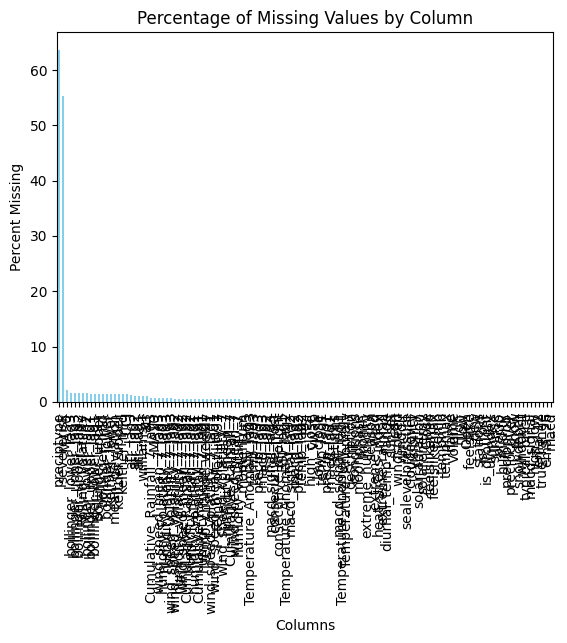

In [15]:
import pandas as pd

# Generate Missing Value Report
def missing_value_report(data):
    missing_values = data.isnull().sum()
    total_values = data.shape[0]
    percent_missing = (missing_values / total_values) * 100
    
    missing_report = pd.DataFrame({
        'Column': data.columns,
        'Missing Values': missing_values,
        'Percent Missing': percent_missing
    }).sort_values(by='Percent Missing', ascending=False)
    
    return missing_report

# Use the function on train_data
missing_report = missing_value_report(train_data)

# Display the report
print(missing_report)

# If you want a visual representation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
missing_report.plot(
    x='Column',
    y='Percent Missing',
    kind='bar',
    legend=False,
    title='Percentage of Missing Values by Column',
    color='skyblue'
)
plt.ylabel('Percent Missing')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()


Correlation with Returns:
                              Correlation with Returns
Returns                                       1.000000
high_close                                    0.661387
williams_r                                    0.434036
momentum                                      0.415134
CCI                                           0.317675
RSI                                           0.266175
true_range                                    0.064934
high_low                                      0.064934
wind_speed_volatility_7_lag2                  0.056749
wind_speed_volatility_7                       0.053121
macd                                          0.052658
wind_speed_volatility_7_lag3                  0.050072
winddir                                       0.043441
wind_speed_volatility_7_lag1                  0.040223
Rolling_Volatility                            0.037389
dew                                           0.030352
humidity                               

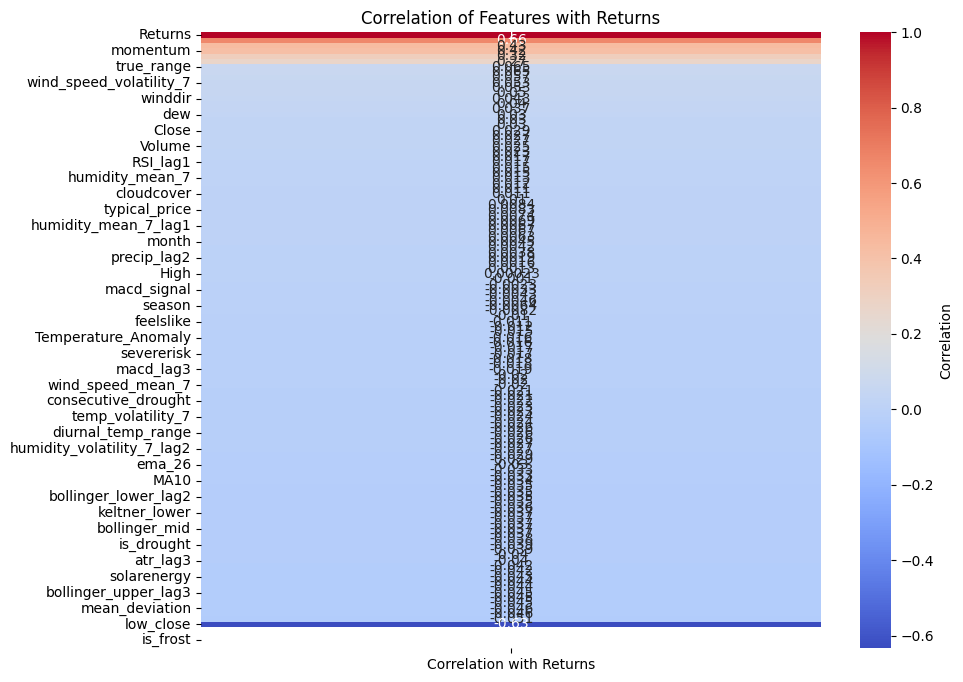


Correlation with Close Price:
                              Correlation with Close Price
Close                                             1.000000
typical_price                                     0.999711
High                                              0.998744
Low                                               0.998700
Open                                              0.997646
ema_12                                            0.994428
MA10                                              0.993495
ema_26                                            0.987512
keltner_upper                                     0.986895
bollinger_mid                                     0.986745
keltner_mid                                       0.986745
keltner_lower                                     0.984927
bollinger_upper                                   0.983472
bollinger_upper_lag1                              0.981083
MA30                                              0.980333
bollinger_upper_lag2     

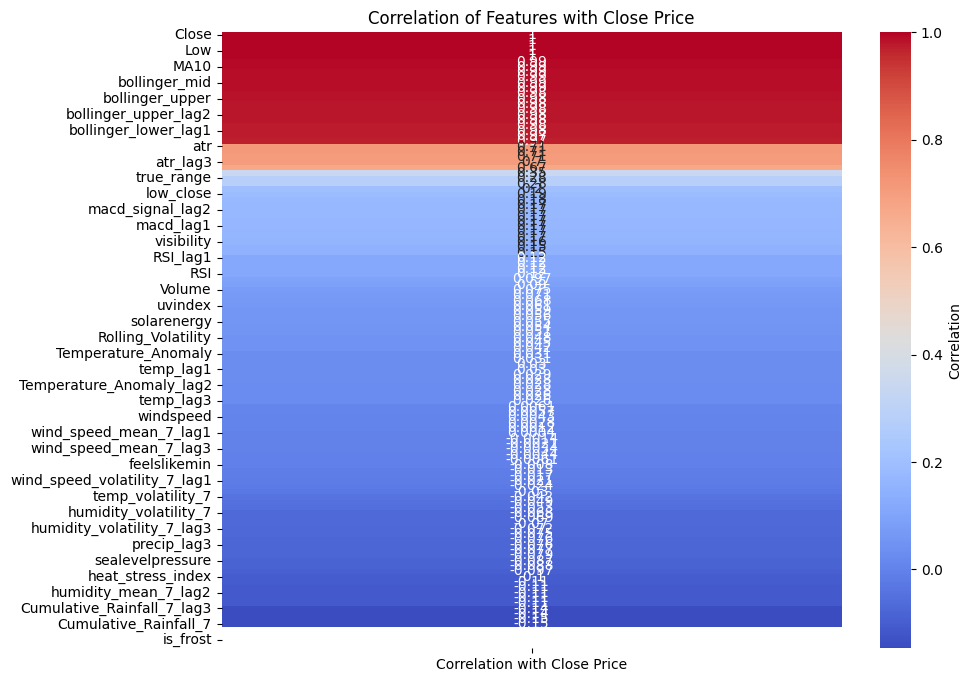

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = train_data.select_dtypes(include=[np.number])

# Correlation with Returns
returns_correlation = numeric_data.corr()['Returns'].sort_values(ascending=False).to_frame(name='Correlation with Returns')
print("Correlation with Returns:")
print(returns_correlation)

# Plot the heatmap for Returns Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(returns_correlation, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title("Correlation of Features with Returns")
plt.show()

# Correlation with Close Price
close_price_correlation = numeric_data.corr()['Close'].sort_values(ascending=False).to_frame(name='Correlation with Close Price')
print("\nCorrelation with Close Price:")
print(close_price_correlation)

# Plot the heatmap for Close Price Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(close_price_correlation, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title("Correlation of Features with Close Price")
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_data = train_data.drop(columns=['name','conditions','description','stations','icon','preciptype','sunrise','sunset','severerisk'])  # Use all features except 'Returns'
train_data = train_data.dropna()

In [18]:
# Feature Engineering on test_data
test_data['Temperature_Anomaly'] = test_data['temp'] - test_data['temp'].mean()
test_data['Cumulative_Rainfall_7'] = test_data['precip'].rolling(window=7).sum()
test_data['is_frost'] = (test_data['tempmin'] < 0).astype(int)
test_data['is_drought'] = (test_data['Cumulative_Rainfall_7'] < 10).astype(int)
test_data['temp_volatility_7'] = test_data['temp'].rolling(window=7).std()
test_data['extreme_rainfall'] = (test_data['precip'] > 20).astype(int)
test_data['consecutive_frost'] = (test_data['tempmin'] < 0).rolling(window=3).sum()
test_data['consecutive_drought'] = (test_data['Cumulative_Rainfall_7'] < 10).rolling(window=3).sum()

# Bollinger Bands
test_data['bollinger_mid'] = test_data['Close'].rolling(window=20).mean()
test_data['bollinger_upper'] = test_data['bollinger_mid'] + 2 * test_data['Close'].rolling(window=20).std()
test_data['bollinger_lower'] = test_data['bollinger_mid'] - 2 * test_data['Close'].rolling(window=20).std()

# MACD (Moving Average Convergence Divergence)
test_data['ema_12'] = test_data['Close'].ewm(span=12, adjust=False).mean()
test_data['ema_26'] = test_data['Close'].ewm(span=26, adjust=False).mean()
test_data['macd'] = test_data['ema_12'] - test_data['ema_26']
test_data['macd_signal'] = test_data['macd'].ewm(span=9, adjust=False).mean()

# ATR (Average True Range)
test_data['high_low'] = test_data['High'] - test_data['Low']
test_data['high_close'] = abs(test_data['High'] - test_data['Close'].shift(1))
test_data['low_close'] = abs(test_data['Low'] - test_data['Close'].shift(1))
test_data['true_range'] = test_data[['high_low', 'high_close', 'low_close']].max(axis=1)
test_data['atr'] = test_data['true_range'].rolling(window=14).mean()

# RSI Calculation
test_data['RSI'] = calculate_rsi(test_data['Close'])

# Moving Averages
short_window = 10
long_window = 30
test_data['MA10'] = test_data['Close'].rolling(window=short_window).mean()
test_data['MA30'] = test_data['Close'].rolling(window=long_window).mean()

# Returns
test_data['Returns'] = test_data['Close'].pct_change()

# Lagged Features
lagged_features = ['temp', 'precip', 'Temperature_Anomaly', 'Cumulative_Rainfall_7']
for feature in lagged_features:
    for lag in range(1, 4):  # Adding 3 lags for each feature
        test_data[f"{feature}_lag{lag}"] = test_data[feature].shift(lag)

# Drop rows with NaN values caused by rolling operations or lags
# test_data = test_data.dropna()

# Final Verification
print(f"Processed test_data shape: {test_data.shape}")
test_data


C:\Users\arpan\AppData\Local\Temp\ipykernel_8484\4222571832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Temperature_Anomaly'] = test_data['temp'] - test_data['temp'].mean()
C:\Users\arpan\AppData\Local\Temp\ipykernel_8484\4222571832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Cumulative_Rainfall_7'] = test_data['precip'].rolling(window=7).sum()
C:\Users\arpan\AppData\Local\Temp\ipykernel_8484\4222571832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

Processed test_data shape: (366, 74)


,Open,High,Low,Close,Volume,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Returns,Rolling_Volatility,Temperature_Anomaly,Cumulative_Rainfall_7,is_frost,is_drought,temp_volatility_7,extreme_rainfall,consecutive_frost,consecutive_drought,bollinger_mid,bollinger_upper,bollinger_lower,ema_12,ema_26,macd,macd_signal,high_low,high_close,low_close,true_range,atr,RSI,MA10,MA30,temp_lag1,temp_lag2,temp_lag3,precip_lag1,precip_lag2,precip_lag3,Temperature_Anomaly_lag1,Temperature_Anomaly_lag2,Temperature_Anomaly_lag3,Cumulative_Rainfall_7_lag1,Cumulative_Rainfall_7_lag2,Cumulative_Rainfall_7_lag3
2023-09-01 00:00:00-04:00,154.258,156.187,151.482,151.528,409.6225,brazil,28.9,18.1,22.6,28.5,18.1,22.6,16.1,69.8,1.4,100,8.33,rain,0,0,31.3,16.2,76.4,1016.3,61.5,11.7,196.5,17.2,9,10.0,2023-09-01T06:17:47,2023-09-01T18:06:04,0.55,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"86715099999,83379099999,SBBR,83377099999,83378...",NaN,0.184554,0.185519,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,151.528000,151.528000,0.000000,0.000000,4.705,NaN,NaN,4.705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-02 00:00:00-04:00,151.528,151.528,151.528,151.528,0.0000,brazil,28.7,18.6,23.4,28.4,18.6,23.4,16.0,65.3,0.0,0,0.00,rain,0,0,37.1,16.6,34.5,1015.6,42.3,12.4,218.8,18.9,9,10.0,2023-09-02T06:17:02,2023-09-02T18:06:10,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83377099999,83378099999,86716...",0.000000,0.184554,0.985519,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,151.528000,151.528000,0.000000,0.000000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,22.6,NaN,NaN,1.4,NaN,NaN,0.185519,NaN,NaN,NaN,NaN,NaN
2023-09-03 00:00:00-04:00,151.528,151.528,151.528,151.528,0.0000,brazil,30.2,19.2,24.3,29.4,19.2,24.1,14.6,57.4,0.0,0,0.00,NaN,0,0,26.6,13.7,70.6,1015.4,29.8,12.2,243.5,21.1,9,10.0,2023-09-03T06:16:18,2023-09-03T18:06:16,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83377099999,83378099999,86716...",0.000000,0.184554,1.885519,NaN,0,0,NaN,0,0.0,0.0,NaN,NaN,NaN,151.528000,151.528000,0.000000,0.000000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,23.4,22.6,NaN,0.0,1.4,NaN,0.985519,0.185519,NaN,NaN,NaN,NaN
2023-09-04 00:00:00-04:00,151.528,151.528,151.528,151.528,0.0000,brazil,30.6,18.1,24.5,29.5,18.1,24.3,13.4,52.6,0.0,0,0.00,NaN,0,0,19.8,7.9,21.7,1015.6,45.8,11.1,168.5,14.6,9,10.0,2023-09-04T06:15:33,2023-09-04T18:06:21,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,SBBR,83377099999,83378099999,86716...",0.000000,0.146314,2.085519,NaN,0,0,NaN,0,0.0,0.0,NaN,NaN,NaN,151.528000,151.528000,0.000000,0.000000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,24.3,23.4,22.6,0.0,0.0,1.4,1.885519,0.985519,0.185519,NaN,NaN,NaN
2023-09-05 00:00:00-04:00,151.528,153.767,148.387,153.327,498.8550,brazil,30.6,21.5,25.8,29.8,21.5,25.6,14.0,49.6,0.0,0,0.00,NaN,0,0,22.7,15.0,92.4,1015.9,66.0,12.2,180.0,15.5,9,10.0,2023-09-05T06:14:48,2023-09-05T18:06:27,0.69,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"86715099999,83379099999,SBBR,83377099999,83378...",0.011872,0.151851,3.385519,NaN,0,0,NaN,0,0.0,0.0,NaN,NaN,NaN,151.804769,151.661259,0.143510,0.028702,5.380,2.239,3.141,5.380,NaN,100.000000,NaN,NaN,24.5,24.3,23.4,0.0,0.0,0.0,2.085519,1.885519,0.985519,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-27 00:00:00-04:00,246.158,259.238,246.158,255.499,692.3450,brazil,28.6,15.2,22.1,27.5,15.2,21.9

In [19]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from joblib import Parallel, delayed

# def backtest_combined_strategy(
#     data, exit_bars, atr_threshold, temp_threshold, leverage=2, 
#     stop_loss=0.05, take_profit=0.10, transaction_cost=0.001, slippage=0.001, initial_capital=10000
# ):
#     data = data.copy()
#     # Initialize columns
#     data['Signal'] = np.nan
#     data['Position'] = 0      # number of shares held
#     data['Cash'] = initial_capital
#     data['Portfolio Value'] = 0.0
#     data['Entry_Price'] = np.nan
#     data['Entry_Bar'] = np.nan
#     data['Reason'] = np.nan
    
#     # Conditions incorporating parameters
#     # Trend-following long entries if MACD > MACD signal and ATR > atr_threshold
#     long_condition = (data['macd'] > data['macd_signal'])
#     # Mean-reversion short (or rather closing long) if RSI > 70 and temp > temp_threshold
#     short_condition = (data['RSI'] > 70)
    
#     data.loc[long_condition, 'Signal'] = 1
#     data.loc[short_condition, 'Signal'] = -1

#     position = 0
#     shares = 0
#     entry_price = np.nan
#     entry_bar_index = None
#     cash = initial_capital

#     # Iterate over each day
#     for i in range(len(data)):
#         current_price = data.iloc[i]['Close']
#         signal = data.iloc[i]['Signal']

#         # Compute today's portfolio value
#         portfolio_value = cash + shares * current_price
#         data.iloc[i, data.columns.get_loc('Portfolio Value')] = portfolio_value

#         if position == 0:
#             # Potential Entry
#             if signal == 1:
#                 # Buy with leverage
#                 # Notional = cash * leverage
#                 # Include transaction cost on entry
#                 entry_px = current_price * (1 + slippage)
#                 # shares = floor((capital * leverage) / (entry_px * (1+transaction_cost))) - approximate
#                 # To be precise, we first decide how much to invest:
#                 invest_amount = cash * leverage
#                 # transaction_cost_amount depends on notional: invest_amount * transaction_cost
#                 # shares must be integer
#                 shares = int(np.floor(invest_amount / (entry_px * (1 + transaction_cost))))
                
#                 if shares > 0:
#                     # Deduct transaction cost
#                     cost = shares * entry_px * transaction_cost
#                     total_spent = shares * entry_px + cost
#                     cash = cash - total_spent
#                     position = 1
#                     entry_price = entry_px
#                     entry_bar_index = i

#                     data.iloc[i, data.columns.get_loc('Position')] = shares
#                     data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
#                     data.iloc[i, data.columns.get_loc('Entry_Bar')] = i
#                     data.iloc[i, data.columns.get_loc('Reason')] = "Long Entry"
#                 else:
#                     # Not enough capital to buy even 1 share after costs
#                     # No trade executed
#                     data.iloc[i, data.columns.get_loc('Position')] = 0
#             else:
#                 data.iloc[i, data.columns.get_loc('Position')] = 0
#         else:
#             # Position is held
#             days_in_trade = i - entry_bar_index if entry_bar_index is not None else 0
#             exit_px = current_price * (1 - slippage)

#             # Check exit conditions: exit_bars, stop_loss, take_profit, signal reversal
#             # if days_in_trade >= exit_bars:
#             #     # Exit because time limit reached
#             #     pnl = shares * (exit_px - entry_price)
#             #     cost = shares * exit_px * transaction_cost
#             #     pnl = pnl - cost
#             #     cash += pnl
#             #     position = 0
#             #     shares = 0
#             #     data.iloc[i, data.columns.get_loc('Position')] = shares
#             #     data.iloc[i, data.columns.get_loc('Reason')] = "Exit Bars Reached"
#             #     data.iloc[i, data.columns.get_loc('Entry_Price')] = np.nan
#             #     data.iloc[i, data.columns.get_loc('Entry_Bar')] = np.nan
#             if exit_px <= entry_price * (1 - stop_loss):
#                 # Stop loss
#                 pnl = shares * (exit_px - entry_price)
#                 cost = shares * exit_px * transaction_cost
#                 pnl -= cost
#                 cash += pnl
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = shares
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Stop Loss Triggered"
#                 data.iloc[i, data.columns.get_loc('Entry_Price')] = np.nan
#                 data.iloc[i, data.columns.get_loc('Entry_Bar')] = np.nan
#             elif exit_px >= entry_price * (1 + take_profit):
#                 # Take profit
#                 pnl = shares * (exit_px - entry_price)
#                 cost = shares * exit_px * transaction_cost
#                 pnl -= cost
#                 cash += pnl
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = shares
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Take Profit Triggered"
#                 data.iloc[i, data.columns.get_loc('Entry_Price')] = np.nan
#                 data.iloc[i, data.columns.get_loc('Entry_Bar')] = np.nan
#             elif signal == -1:
#                 # Signal reversal - exit
#                 pnl = shares * (exit_px - entry_price)
#                 cost = shares * exit_px * transaction_cost
#                 pnl -= cost
#                 cash += pnl
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = shares
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Signal Reversal Exit"
#                 data.iloc[i, data.columns.get_loc('Entry_Price')] = np.nan
#                 data.iloc[i, data.columns.get_loc('Entry_Bar')] = np.nan
#             else:
#                 # Hold position
#                 data.iloc[i, data.columns.get_loc('Position')] = shares
#                 data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
#                 data.iloc[i, data.columns.get_loc('Entry_Bar')] = entry_bar_index
    
#     # Final portfolio values
#     data['Portfolio Value'] = data['Cash'] + data['Position'] * data['Close']
#     # Compute daily returns from portfolio value
#     data['Portfolio Returns'] = data['Portfolio Value'].pct_change().fillna(0)

#     # Compute metrics for optimization
#     risk_free_rate = 0.03
#     strat_returns = data['Portfolio Returns']
#     if strat_returns.std() != 0:
#         sharpe_ratio = ((strat_returns.mean() - (risk_free_rate / 252)) / 
#                         strat_returns.std() * np.sqrt(252))
#     else:
#         sharpe_ratio = np.nan
#     cumulative_return = (1 + strat_returns).prod() - 1
#     # Count trades: a trade occurs each time we go from 0 to shares and back
#     # We'll just count every "buy" and "sell" occurrence
#     # Signal changes from NaN to 1 or from position to 0
#     # More simply, count number of exits: that equals number of round trips
#     trade_entries = data['Reason'].str.contains("Long Entry", na=False).sum()
#     # One round trip = 1 buy + 1 sell, but we might have partial logic
#     # We'll approximate trades by counting each exit reason (Stop Loss, Take Profit, etc.)
#     trade_exits = data['Reason'].str.contains("Exit Bars|Stop Loss|Take Profit|Signal Reversal", na=False).sum()
#     # Number of round trips is min(trade_entries, trade_exits)
#     trades = min(trade_entries, trade_exits)

#     return sharpe_ratio, int(trades), cumulative_return


# def grid_search_combined_strategy(
#     data, exit_bars_range, atr_threshold_range, temp_threshold_range, leverage_range, stop_loss_range, take_profit_range
# ):
#     results = []

#     def evaluate_params(exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit):
#         sharpe, trades, cum_ret = backtest_combined_strategy(
#             data, exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit
#         )
#         return (exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit, sharpe, trades, cum_ret)

#     param_combinations = [
#         (bars, atr, temp, lev, sl, tp)
#         for bars in exit_bars_range
#         for atr in atr_threshold_range
#         for temp in temp_threshold_range
#         for lev in leverage_range
#         for sl in stop_loss_range
#         for tp in take_profit_range
#     ]

#     results = Parallel(n_jobs=-1)(
#         delayed(evaluate_params)(bars, atr, temp, lev, sl, tp)
#         for bars, atr, temp, lev, sl, tp in param_combinations
#     )

#     results_df = pd.DataFrame(results, columns=[
#         'Exit Bars', 'ATR Threshold', 'Temp Threshold', 'Leverage', 'Stop Loss', 'Take Profit',
#         'Sharpe Ratio', 'Trades', 'Cumulative Return'
#     ])
#     return results_df

# # Example usage:
# data = train_data.copy()
# data['Returns'] = data['Close'].pct_change()
# data.dropna(inplace=True)
# exit_bars_range = [5, 10]
# atr_threshold_range = np.linspace(0.01, 0.05, 3)
# temp_threshold_range = np.linspace(-1, 1, 3)
# leverage_range = [1, 2, 3]
# stop_loss_range = [0.02, 0.05, 0.1]
# take_profit_range = [0.05, 0.1, 0.15]

# results_df = grid_search_combined_strategy(
#     data, exit_bars_range, atr_threshold_range, temp_threshold_range,
#     leverage_range, stop_loss_range, take_profit_range
# )

# optimal_result = results_df.loc[results_df['Sharpe Ratio'].idxmax()]
# print("Optimal Parameters:\n", optimal_result)


In [20]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import pyfolio as pf

# def calculate_sortino_ratio(returns, risk_free_rate=0.03, target_return=0):
#     excess_returns = returns - (risk_free_rate / 252)
#     downside_deviation = np.sqrt(((returns[returns < target_return] - target_return) ** 2).mean())
#     if downside_deviation == 0:
#         return np.nan
#     return np.sqrt(252) * (excess_returns.mean() - target_return) / downside_deviation

# def calculate_calmar_ratio(cumulative_return, max_drawdown):
#     if max_drawdown == 0:
#         return np.nan
#     return cumulative_return / abs(max_drawdown)


# def backtest_combined_strategy(
#     data, exit_bars, atr_threshold, temp_threshold, leverage=2,
#     stop_loss=0.05, take_profit=0.10, transaction_cost=0.001, slippage=0.001, initial_capital=10000
# ):
#     data = data.copy()
#     data['Signal'] = np.nan
#     data['Position'] = 0
#     data['Cash'] = initial_capital
#     data['Portfolio Value'] = 0.0
#     data['Entry_Price'] = np.nan
#     data['Entry_Bar'] = np.nan
#     data['Reason'] = np.nan

#     # Conditions
#     long_condition = (data['macd'] > data['macd_signal'])
#     short_condition = (data['RSI'] > 70)

#     data.loc[long_condition, 'Signal'] = 1
#     data.loc[long_condition, 'Reason'] = "Long Entry Condition"
#     data.loc[short_condition, 'Signal'] = -1
#     data.loc[short_condition, 'Reason'] = "Short Exit Condition"

#     position = 0
#     shares = 0
#     entry_price = np.nan
#     entry_bar_index = None
#     cash = initial_capital

#     for i in range(len(data)):
#         current_price = data.iloc[i]['Close']
#         signal = data.iloc[i]['Signal']

#         # Update portfolio value daily
#         portfolio_value = cash + shares * current_price
#         data.iloc[i, data.columns.get_loc('Portfolio Value')] = portfolio_value

#         if position == 0:
#             # Potential Entry
#             if signal == 1:
#                 # Buy with leverage
#                 entry_px = current_price * (1 + slippage)
#                 invest_amount = cash * leverage
#                 shares = int(np.floor(invest_amount / (entry_px * (1 + transaction_cost))))
#                 if shares > 0:
#                     cost = shares * entry_px * transaction_cost
#                     total_spent = shares * entry_px + cost
#                     cash -= total_spent
#                     position = 1
#                     entry_price = entry_px
#                     entry_bar_index = i

#                     data.iloc[i, data.columns.get_loc('Position')] = shares
#                     data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
#                     data.iloc[i, data.columns.get_loc('Entry_Bar')] = i
#                     data.iloc[i, data.columns.get_loc('Reason')] = "Long Entry Executed"
#                 else:
#                     data.iloc[i, data.columns.get_loc('Position')] = 0
#             else:
#                 data.iloc[i, data.columns.get_loc('Position')] = 0
#         else:
#             # Position is held
#             days_in_trade = i - entry_bar_index if entry_bar_index is not None else 0
#             exit_px = current_price * (1 - slippage)

#             # if days_in_trade >= exit_bars:
#             #     # Exit due to time limit
#             #     pnl = shares * (exit_px - entry_price)
#             #     cost = shares * exit_px * transaction_cost
#             #     pnl -= cost
#             #     cash += pnl
#             #     position = 0
#             #     shares = 0
#             #     data.iloc[i, data.columns.get_loc('Position')] = shares
#             #     data.iloc[i, data.columns.get_loc('Reason')] = "Exit Bars Reached"
#             #     data.iloc[i, data.columns.get_loc('Entry_Price')] = np.nan
#             #     data.iloc[i, data.columns.get_loc('Entry_Bar')] = np.nan
#             if exit_px <= entry_price * (1 - stop_loss):
#                 # Stop loss
#                 pnl = shares * (exit_px - entry_price)
#                 cost = shares * exit_px * transaction_cost
#                 pnl -= cost
#                 cash += pnl
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = shares
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Stop Loss Triggered"
#                 data.iloc[i, data.columns.get_loc('Entry_Price')] = np.nan
#                 data.iloc[i, data.columns.get_loc('Entry_Bar')] = np.nan
#             elif exit_px >= entry_price * (1 + take_profit):
#                 # Take profit
#                 pnl = shares * (exit_px - entry_price)
#                 cost = shares * exit_px * transaction_cost
#                 pnl -= cost
#                 cash += pnl
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = shares
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Take Profit Triggered"
#                 data.iloc[i, data.columns.get_loc('Entry_Price')] = np.nan
#                 data.iloc[i, data.columns.get_loc('Entry_Bar')] = np.nan
#             elif signal == -1:
#                 # Signal reversal exit
#                 pnl = shares * (exit_px - entry_price)
#                 cost = shares * exit_px * transaction_cost
#                 pnl -= cost
#                 cash += pnl
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = shares
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Signal Reversal Exit"
#                 data.iloc[i, data.columns.get_loc('Entry_Price')] = np.nan
#                 data.iloc[i, data.columns.get_loc('Entry_Bar')] = np.nan
#             else:
#                 # Hold
#                 data.iloc[i, data.columns.get_loc('Position')] = shares
#                 data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
#                 data.iloc[i, data.columns.get_loc('Entry_Bar')] = entry_bar_index

#     # Final calculations
#     data['Portfolio Value'] = cash + data['Position'] * data['Close']
#     data['Portfolio Returns'] = data['Portfolio Value'].pct_change().fillna(0)
#     strat_returns = data['Portfolio Returns']

#     # Metrics
#     risk_free_rate = 0.03
#     sharpe_ratio = ((strat_returns.mean() - (risk_free_rate/252)) / strat_returns.std() * np.sqrt(252)) if strat_returns.std()!=0 else np.nan
#     cumulative_return = (1 + strat_returns).prod() - 1
#     drawdown = (data['Portfolio Value'] / data['Portfolio Value'].cummax() - 1).min()
#     sortino_ratio = calculate_sortino_ratio(strat_returns.dropna())
#     calmar_ratio = calculate_calmar_ratio(cumulative_return, drawdown)

#     # Trade log
#     trade_log = data[data['Reason'].notna()][['Reason','Close']]
#     trade_log['Date'] = trade_log.index
#     # Determine action: if Reason = Long Entry Executed => 'Buy', if Reason in exits => 'Sell'
#     trade_log['Action'] = trade_log['Reason'].apply(lambda x: 'Buy' if 'Long Entry' in x else 'Sell')
#     trade_log.rename(columns={'Close':'Price'}, inplace=True)

#     # Additional metrics
#     winning_days = strat_returns[strat_returns > 0]
#     losing_days = strat_returns[strat_returns < 0]
#     win_rate = len(winning_days) / max(len(winning_days) + len(losing_days), 1)
#     average_gain = winning_days.mean() if not winning_days.empty else 0
#     average_loss = losing_days.mean() if not losing_days.empty else 0

#     metrics = {
#         'Sharpe Ratio': sharpe_ratio,
#         'Sortino Ratio': sortino_ratio,
#         'Calmar Ratio': calmar_ratio,
#         'Max Drawdown': drawdown,
#         'Cumulative Return': cumulative_return,
#         'Number of Days in Market': (data['Position'] != 0).sum(),
#         'Win Rate': win_rate,
#         'Average Gain': average_gain,
#         'Average Loss': average_loss
#     }

#     # Count trades as before
#     trade_entries = trade_log[trade_log['Action'] == 'Buy'].shape[0]
#     trade_exits = trade_log[trade_log['Action'] == 'Sell'].shape[0]
#     metrics['Number of Trades'] = min(trade_entries, trade_exits)

#     return data, trade_log, metrics

# # Example final backtest:
# test_data = test_data.copy()
# test_data['Returns'] = test_data['Close'].pct_change()
# test_data.dropna(inplace=True)
# test_results, trade_log, metrics = backtest_combined_strategy(
#     test_data,
#     exit_bars=optimal_result['Exit Bars'],
#     atr_threshold=optimal_result['ATR Threshold'],
#     temp_threshold=optimal_result['Temp Threshold'],
#     leverage=2,
#     stop_loss=0.05,
#     take_profit=0.10
# )

# # Print metrics
# print("Metrics:")
# for k, v in metrics.items():
#     print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# # Plot results
# plt.figure(figsize=(12, 6))
# plt.plot(test_results['Portfolio Value'], label='Portfolio Value', color='blue')
# plt.title('Portfolio Value Over Time')
# plt.xlabel('Date')
# plt.ylabel('Portfolio Value')
# plt.legend()
# plt.show()

# # If Pyfolio is available:
# returns_series = test_results['Portfolio Returns']
# # pf.create_full_tear_sheet(returns_series)


In [21]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from joblib import Parallel, delayed

# def backtest_combined_strategy(
#     data, exit_bars, atr_threshold, temp_threshold, leverage=2, 
#     stop_loss=0.05, take_profit=0.10, transaction_cost=0.001, slippage=0.001
# ):
#     data = data.copy()
#     data['Position'] = 0
#     data['Strategy'] = 0
#     data['Signal'] = np.nan
#     data['Entry_Price'] = np.nan  # Track entry price for stop-loss/take-profit

#     # Trend-following strategy: Strong technical indicators (e.g., MACD, MA crossovers)
#     trend_follow_condition = (data['macd'] > data['macd_signal'])

#     # Mean-reversion strategy: Weather features and overbought/oversold conditions
#     mean_reversion_condition = ((data['RSI'] > 70)
#     )

#     # Entry signals
#     data.loc[trend_follow_condition, 'Signal'] = 1  # Trend-following buy
#     data.loc[mean_reversion_condition, 'Signal'] = -1  # Mean-reversion sell

#     position = 0
#     entry_price = 0

#     for i in range(len(data)):
#         if data.iloc[i]['Signal'] == 1 and position == 0:
#             # Enter long position with leverage
#             position = leverage
#             entry_price = data.iloc[i]['Close'] * (1 + slippage)
#             data.iloc[i, data.columns.get_loc('Position')] = position
#             data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
#         elif position > 0:
#             current_price = data.iloc[i]['Close'] * (1 - slippage)
#             # Check for stop-loss
#             if current_price <= entry_price * (1 - stop_loss):
#                 position = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Signal')] = -1  # Stop-loss exit
#             # Check for take-profit
#             elif current_price >= entry_price * (1 + take_profit):
#                 position = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Signal')] = -1  # Take-profit exit
#             # Check for exit signal
#             elif data.iloc[i]['Signal'] == -1:
#                 position = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#             else:
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#         else:
#             data.iloc[i, data.columns.get_loc('Position')] = position

#     # Forward-fill Entry_Price
#     data['Entry_Price'] = data['Entry_Price'].ffill()

#     data['Position'] = data['Position'].ffill().fillna(0)
    
#     # Deduct transaction costs when trades are made
#     trade_costs = abs(data['Signal'].diff().fillna(0)) * transaction_cost
#     data['Strategy'] = (data['Position'].shift(1) * data['Returns']) - trade_costs

#     # Performance metrics
#     trades = data['Signal'].diff().abs().sum() / 2
#     # Include a risk-free rate (3% annualized)
#     risk_free_rate = 0.03  # 3% annualized risk-free rate

#     sharpe_ratio = (
#         (data['Strategy'].mean() - (risk_free_rate / 252)) / data['Strategy'].std() * np.sqrt(252)
#         if data['Strategy'].std() != 0 else np.nan
#     )

#     cumulative_return = (1 + data['Strategy']).prod() - 1

#     return sharpe_ratio, int(trades), cumulative_return


# # Grid search for combined strategy
# def grid_search_combined_strategy(
#     data, exit_bars_range, atr_threshold_range, temp_threshold_range, leverage_range, stop_loss_range, take_profit_range
# ):
#     results = []

#     def evaluate_params(exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit):
#         sharpe, trades, cumulative_return = backtest_combined_strategy(
#             data, exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit
#         )
#         return (exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit, sharpe, trades, cumulative_return)

#     # Generate parameter combinations
#     param_combinations = [
#         (bars, atr, temp, lev, sl, tp)
#         for bars in exit_bars_range
#         for atr in atr_threshold_range
#         for temp in temp_threshold_range
#         for lev in leverage_range
#         for sl in stop_loss_range
#         for tp in take_profit_range
#     ]

#     # Parallel processing
#     results = Parallel(n_jobs=-1)(
#         delayed(evaluate_params)(bars, atr, temp, lev, sl, tp) for bars, atr, temp, lev, sl, tp in param_combinations
#     )

#     # Convert results to DataFrame
#     results_df = pd.DataFrame(results, columns=[
#         'Exit Bars', 'ATR Threshold', 'Temp Threshold', 'Leverage', 'Stop Loss', 'Take Profit',
#         'Sharpe Ratio', 'Trades', 'Cumulative Return'
#     ])
#     return results_df

# # Define parameter ranges
# exit_bars_range = range(5, 15, 5)
# atr_threshold_range = np.linspace(0.01, 0.05, 3)
# temp_threshold_range = np.linspace(-1, 1, 3)
# leverage_range = [1, 2, 3]
# stop_loss_range = [0.02, 0.05, 0.1]
# take_profit_range = [0.05, 0.1, 0.15]

# # Preprocess your data
# data = train_data.copy()
# data['Returns'] = data['Close'].pct_change()
# data.dropna(inplace=True)

# # Run grid search
# results_df = grid_search_combined_strategy(
#     data, exit_bars_range, atr_threshold_range, temp_threshold_range,
#     leverage_range, stop_loss_range, take_profit_range
# )

# # Analyze results
# optimal_result = results_df.loc[results_df['Sharpe Ratio'].idxmax()]
# print(f"Optimal Parameters:\n{optimal_result}")

# # Visualize Sharpe Ratios
# pivot_table = results_df.pivot_table(
#     index='Leverage', columns='Stop Loss', values='Sharpe Ratio'
# )
# plt.figure(figsize=(10, 6))
# sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Sharpe Ratio'})
# plt.title('Optimization Results (Sharpe Ratio)')
# plt.xlabel('Stop Loss')
# plt.ylabel('Leverage')
# plt.show()


In [22]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from joblib import Parallel, delayed

# def backtest_combined_strategy(
#     data, exit_bars, atr_threshold, temp_threshold, leverage=2, 
#     stop_loss=0.05, take_profit=0.10, transaction_cost=0.001, slippage=0.001
# ):
#     data = data.copy()
#     data['Position'] = 0
#     data['Strategy'] = 0
#     data['Signal'] = np.nan
#     data['Entry_Price'] = np.nan
#     data['Shares'] = 0.0

#     # Starting conditions
#     initial_capital = 10000.0
#     capital = initial_capital
#     shares = 0.0
#     position = 0
#     entry_price = 0.0

#     # Define strategy conditions (these can be more complex as needed)
#     trend_follow_condition = (data['macd'] > data['macd_signal'])
#     mean_reversion_condition = (data['RSI'] > 70)

#     # Entry signals
#     data.loc[trend_follow_condition, 'Signal'] = 1  # Buy signal
#     data.loc[mean_reversion_condition, 'Signal'] = -1 # Sell signal

#     portfolio_values = []

#     for i in range(len(data)):
#         current_price = data.iloc[i]['Close']
#         current_signal = data.iloc[i]['Signal']

#         if current_signal == 1 and position == 0:
#             # Enter long position with leverage
#             entry_price = current_price * (1 + slippage)
#             # Calculate number of shares
#             investment_amount = capital * leverage
#             if entry_price > 0:
#                 shares = investment_amount / entry_price
#             else:
#                 shares = 0
#             # Deduct transaction cost on entry (based on notional amount)
#             entry_cost = investment_amount * transaction_cost
#             capital = capital - entry_cost
#             position = 1
#             data.iloc[i, data.columns.get_loc('Position')] = position
#             data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
#             data.iloc[i, data.columns.get_loc('Shares')] = shares

#         elif position == 1:
#             # Check exit conditions
#             exit_price = current_price * (1 - slippage)

#             # Stop-loss condition
#             if exit_price <= entry_price * (1 - stop_loss):
#                 exit_value = shares * exit_price
#                 exit_cost = exit_value * transaction_cost
#                 capital = exit_value - exit_cost
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Shares')] = shares

#             # Take-profit condition
#             elif exit_price >= entry_price * (1 + take_profit):
#                 exit_value = shares * exit_price
#                 exit_cost = exit_value * transaction_cost
#                 capital = exit_value - exit_cost
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Shares')] = shares

#             # Strategy exit signal
#             elif current_signal == -1:
#                 exit_value = shares * exit_price
#                 exit_cost = exit_value * transaction_cost
#                 capital = exit_value - exit_cost
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Shares')] = shares
#             else:
#                 # Remain in position
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Shares')] = shares

#         else:
#             # No position or no change
#             data.iloc[i, data.columns.get_loc('Position')] = position
#             data.iloc[i, data.columns.get_loc('Shares')] = shares

#         # Calculate daily portfolio value
#         if position == 1:
#             daily_portfolio_value = shares * current_price
#         else:
#             daily_portfolio_value = capital

#         portfolio_values.append(daily_portfolio_value)

#     data['Portfolio Value'] = portfolio_values
#     data['Strategy'] = data['Portfolio Value'].pct_change().fillna(0)

#     # Performance metrics
#     trades = data['Signal'].diff().abs().sum() / 2
#     risk_free_rate = 0.03

#     if data['Strategy'].std() != 0:
#         sharpe_ratio = ((data['Strategy'].mean() - (risk_free_rate / 252)) / data['Strategy'].std()) * np.sqrt(252)
#     else:
#         sharpe_ratio = np.nan

#     cumulative_return = data['Portfolio Value'].iloc[-1] / data['Portfolio Value'].iloc[0] - 1

#     return sharpe_ratio, int(trades), cumulative_return


# def grid_search_combined_strategy(
#     data, exit_bars_range, atr_threshold_range, temp_threshold_range, leverage_range, stop_loss_range, take_profit_range
# ):
#     def evaluate_params(exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit):
#         sharpe, trades, cumulative_return = backtest_combined_strategy(
#             data, exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit
#         )
#         return (exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit, sharpe, trades, cumulative_return)

#     # Generate parameter combinations
#     param_combinations = [
#         (bars, atr, temp, lev, sl, tp)
#         for bars in exit_bars_range
#         for atr in atr_threshold_range
#         for temp in temp_threshold_range
#         for lev in leverage_range
#         for sl in stop_loss_range
#         for tp in take_profit_range
#     ]

#     # Parallel processing
#     results = Parallel(n_jobs=-1)(
#         delayed(evaluate_params)(bars, atr, temp, lev, sl, tp) 
#         for bars, atr, temp, lev, sl, tp in param_combinations
#     )

#     # Convert results to DataFrame
#     results_df = pd.DataFrame(results, columns=[
#         'Exit Bars', 'ATR Threshold', 'Temp Threshold', 'Leverage', 'Stop Loss', 'Take Profit',
#         'Sharpe Ratio', 'Trades', 'Cumulative Return'
#     ])
#     return results_df

# # Define parameter ranges
# exit_bars_range = range(5, 15, 5)
# atr_threshold_range = np.linspace(0.01, 0.05, 3)
# temp_threshold_range = np.linspace(-1, 1, 3)
# leverage_range = [1, 2, 3]
# stop_loss_range = [0.02, 0.05, 0.1]
# take_profit_range = [0.05, 0.1, 0.15]

# # Preprocess your data (ensure train_data is loaded with 'Close', 'macd', 'macd_signal', 'RSI')
# data = train_data.copy()
# data['Returns'] = data['Close'].pct_change()
# data.dropna(inplace=True)

# # Run grid search
# results_df = grid_search_combined_strategy(
#     data, exit_bars_range, atr_threshold_range, temp_threshold_range,
#     leverage_range, stop_loss_range, take_profit_range
# )

# # Analyze results
# optimal_result = results_df.loc[results_df['Sharpe Ratio'].idxmax()]
# print(f"Optimal Parameters:\n{optimal_result}")

# # Visualize Sharpe Ratios (example visualization)
# pivot_table = results_df.pivot_table(
#     index='Leverage', columns='Stop Loss', values='Sharpe Ratio'
# )
# plt.figure(figsize=(10, 6))
# sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Sharpe Ratio'})
# plt.title('Optimization Results (Sharpe Ratio)')
# plt.xlabel('Stop Loss')
# plt.ylabel('Leverage')
# plt.show()


In [23]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# # import pyfolio as pf


# def calculate_sortino_ratio(returns, risk_free_rate=0.03, target_return=0):
#     """Calculate the Sortino ratio."""
#     excess_returns = returns - (risk_free_rate / 252)
#     downside_deviation = np.sqrt(((returns[returns < target_return] - target_return) ** 2).mean())
#     if downside_deviation == 0:
#         return np.nan
#     sortino_ratio = np.sqrt(252) * (excess_returns.mean() - target_return) / downside_deviation
#     return sortino_ratio


# def calculate_calmar_ratio(cumulative_return, max_drawdown):
#     """Calculate the Calmar ratio."""
#     if max_drawdown == 0:
#         return np.nan
#     return cumulative_return / abs(max_drawdown)


# def backtest_combined_strategy(
#     data, exit_bars, atr_threshold, temp_threshold, leverage=2, stop_loss=0.05, take_profit=0.10,
#     transaction_cost=0.001, slippage=0.001
# ):
#     data = data.copy()
#     data['Position'] = 0
#     data['Strategy'] = 0
#     data['Signal'] = np.nan
#     data['Reason'] = np.nan
#     data['Entry_Price'] = np.nan  # Track entry price for stop-loss and take-profit
#     data['Shares'] = 0.0         # Track the number of shares held
    
#     # Initialize capital and portfolio value tracking
#     initial_capital = 10000.0
#     capital = initial_capital
#     shares = 0.0
    
#     # Trend-following strategy: MACD, MA, and RSI conditions
#     trend_follow_condition = (data['macd'] > data['macd_signal'])

#     # Mean-reversion strategy: Weather features and RSI extremes
#     mean_reversion_condition = (data['RSI'] > 70)
    
#     # Entry and exit signals
#     data.loc[trend_follow_condition, 'Signal'] = 1
#     data.loc[trend_follow_condition, 'Reason'] = "Trend Following: MACD > Signal"
#     data.loc[mean_reversion_condition, 'Signal'] = -1
#     data.loc[mean_reversion_condition, 'Reason'] = "Mean Reversion: RSI > 70"

#     position = 0
#     entry_price = 0.0

#     portfolio_values = []  # Store daily portfolio values

#     for i in range(len(data)):
#         current_price = data.iloc[i]['Close']
        
#         # Check signals
#         current_signal = data.iloc[i]['Signal']
        
#         if current_signal == 1 and position == 0:
#             # Enter position with leverage
#             # Calculate entry price with slippage
#             entry_price = current_price * (1 + slippage)
            
#             # Calculate number of shares: we invest capital * leverage
#             investment_amount = capital * leverage
#             if entry_price > 0:
#                 shares = investment_amount / entry_price
#             else:
#                 shares = 0
            
#             # Deduct transaction cost on entry (based on notional amount)
#             entry_cost = investment_amount * transaction_cost
#             capital = capital - entry_cost
            
#             position = 1
#             data.iloc[i, data.columns.get_loc('Position')] = position
#             data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
#             data.iloc[i, data.columns.get_loc('Shares')] = shares
            
#         elif position == 1:
#             # We are currently in a position, check for exit conditions
#             # Calculate today's price with slippage for hypothetical exit
#             exit_price = current_price * (1 - slippage)

#             # Stop-loss condition
#             if exit_price <= entry_price * (1 - stop_loss):
#                 # Sell all shares at exit price
#                 exit_value = shares * exit_price
#                 # Deduct exit transaction cost
#                 exit_cost = exit_value * transaction_cost
#                 capital = exit_value - exit_cost
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Signal')] = -1
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Stop Loss Triggered"
#                 data.iloc[i, data.columns.get_loc('Shares')] = shares

#             # Take-profit condition
#             elif exit_price >= entry_price * (1 + take_profit):
#                 # Sell all shares at exit price
#                 exit_value = shares * exit_price
#                 # Deduct exit transaction cost
#                 exit_cost = exit_value * transaction_cost
#                 capital = exit_value - exit_cost
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Signal')] = -1
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Take Profit Triggered"
#                 data.iloc[i, data.columns.get_loc('Shares')] = shares

#             # Exit based on strategy signal
#             elif current_signal == -1:
#                 # Sell all shares at exit price
#                 exit_value = shares * exit_price
#                 # Deduct exit transaction cost
#                 exit_cost = exit_value * transaction_cost
#                 capital = exit_value - exit_cost
#                 position = 0
#                 shares = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Shares')] = shares
#             else:
#                 # Remain in position
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Shares')] = shares
#         else:
#             # No position or no trade
#             data.iloc[i, data.columns.get_loc('Position')] = position
#             data.iloc[i, data.columns.get_loc('Shares')] = shares

#         # Calculate daily portfolio value
#         if position == 1:
#             # Holding a position
#             daily_portfolio_value = shares * current_price
#         else:
#             # Flat, portfolio value equals capital
#             daily_portfolio_value = capital
        
#         portfolio_values.append(daily_portfolio_value)

#     # Store portfolio values
#     data['Portfolio Value'] = portfolio_values

#     # Compute daily returns of the strategy
#     data['Strategy'] = data['Portfolio Value'].pct_change().fillna(0)

#     # Performance metrics
#     trades = data['Signal'].diff().abs().sum() / 2
#     # Include a risk-free rate (3% annualized)
#     risk_free_rate = 0.03  # 3% annualized
    
#     if data['Strategy'].std() != 0:
#         sharpe_ratio = ((data['Strategy'].mean() - (risk_free_rate / 252)) / data['Strategy'].std()) * np.sqrt(252)
#     else:
#         sharpe_ratio = np.nan

#     cumulative_return = data['Portfolio Value'].iloc[-1] / data['Portfolio Value'].iloc[0] - 1
#     drawdown = (data['Portfolio Value'] / data['Portfolio Value'].cummax() - 1).min()
#     sortino_ratio = calculate_sortino_ratio(data['Strategy'].dropna())
#     calmar_ratio = calculate_calmar_ratio(cumulative_return, drawdown)  # Calmar traditionally uses % returns, so use cumulative_return-1


#     # Trade log
#     trade_log = data[data['Signal'].notna()][['Signal', 'Reason', 'Close']].copy()
#     trade_log['Date'] = trade_log.index
#     trade_log['Action'] = trade_log['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
#     trade_log.rename(columns={'Close': 'Price'}, inplace=True)

#     # Additional metrics
#     winning_trades = data[data['Strategy'] > 0]
#     losing_trades = data[data['Strategy'] < 0]
#     win_rate = len(winning_trades) / max(len(winning_trades) + len(losing_trades), 1)
#     average_gain = winning_trades['Strategy'].mean() if not winning_trades.empty else 0
#     average_loss = losing_trades['Strategy'].mean() if not losing_trades.empty else 0

#     metrics = {
#         'Sharpe Ratio': sharpe_ratio,
#         'Sortino Ratio': sortino_ratio,
#         'Calmar Ratio': calmar_ratio,
#         'Max Drawdown': drawdown,
#         'Cumulative Return': cumulative_return,
#         'Number of Trades': trades,
#         'Number of Days in Market': (data['Position'] != 0).sum(),
#         'Win Rate': win_rate,
#         'Average Gain': average_gain,
#         'Average Loss': average_loss,
#     }

#     return data, trade_log, metrics


# # Backtest the combined strategy
# test_data = test_data.copy()  # Ensure test_data is preloaded
# test_results, trade_log, metrics = backtest_combined_strategy(
#     test_data, optimal_result['Exit Bars'], optimal_result['ATR Threshold'], optimal_result['Temp Threshold'], leverage=2, stop_loss=0.05, take_profit=0.10
# )

# # Display Metrics
# print("Metrics:")
# for k, v in metrics.items():
#     print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# # Plot Portfolio Value
# plt.figure(figsize=(12, 6))
# plt.plot(test_results['Portfolio Value'], label='Portfolio Value', color='blue')
# plt.title('Portfolio Value Over Time')
# plt.xlabel('Date')
# plt.ylabel('Portfolio Value')
# plt.legend()
# plt.show()

# # Plot Entry/Exit with Price
# plt.figure(figsize=(12, 6))
# plt.plot(test_results['Close'], label='Close Price', color='blue', alpha=0.7)
# buy_signals = trade_log[trade_log['Action'] == 'Buy']
# sell_signals = trade_log[trade_log['Action'] == 'Sell']
# plt.scatter(buy_signals['Date'], buy_signals['Price'], label='Buy Signal', color='green', marker='^')
# plt.scatter(sell_signals['Date'], sell_signals['Price'], label='Sell Signal', color='red', marker='v')
# plt.title('Entry and Exit Points on Price Chart')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

# # Pyfolio Analysis
# returns_series = test_results['Strategy'].dropna()
# # Uncomment below line to generate a full tear sheet
# # pf.create_full_tear_sheet(returns_series)

Optimal Parameters:
Exit Bars            5.000000e+00
ATR Threshold        1.000000e-02
Temp Threshold      -1.000000e+00
Leverage             3.000000e+00
Stop Loss            2.000000e-02
Take Profit          5.000000e-02
Sharpe Ratio         6.337620e+00
Trades               6.700000e+01
Cumulative Return    1.573453e+36
Name: 18, dtype: float64


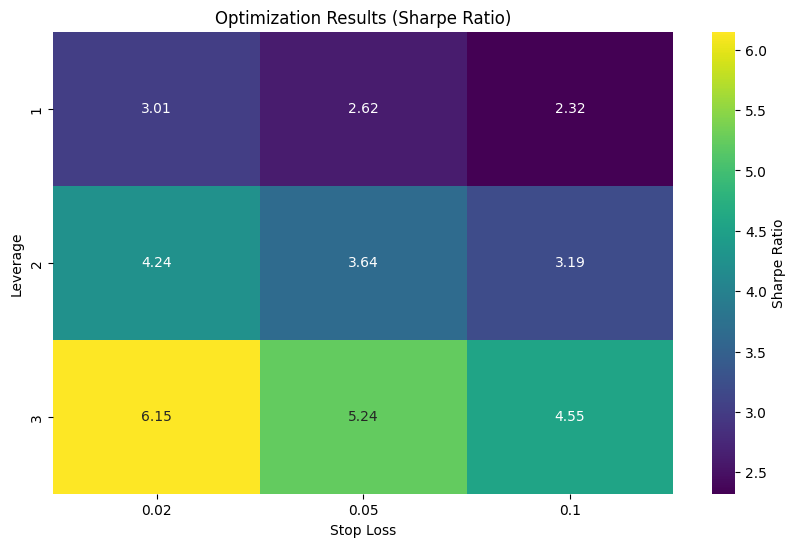

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed

def backtest_combined_strategy(
    data, exit_bars, atr_threshold, temp_threshold, leverage=2, 
    stop_loss=0.05, take_profit=0.10, transaction_cost=0.001, slippage=0.001,
    position_size_fraction=0.5
):
    data = data.copy()
    data['Position'] = 0
    data['Strategy'] = 0
    data['Signal'] = np.nan
    data['Entry_Price'] = np.nan
    data['Shares'] = 0.0

    # Starting conditions
    initial_capital = 10000.0
    capital = initial_capital
    shares = 0.0
    position = 0
    entry_price = 0.0

    # Define strategy conditions
    trend_follow_condition = (data['macd'] > data['macd_signal'])
    mean_reversion_condition = (data['RSI'] > 70)

    # Entry signals
    data.loc[trend_follow_condition, 'Signal'] = 1  # Buy signal
    data.loc[mean_reversion_condition, 'Signal'] = -1 # Sell signal

    portfolio_values = []

    for i in range(len(data)):
        current_price = data.iloc[i]['Close']
        current_signal = data.iloc[i]['Signal']

        if current_signal == 1 and position == 0:
            # Enter long position: invest partial capital * leverage
            entry_price = current_price * (1 + slippage)
            # Compute investment_amount = portion of capital we invest
            investment_amount = capital * leverage * position_size_fraction
            shares = investment_amount / entry_price if entry_price > 0 else 0
            # Deduct transaction cost on entry
            entry_cost = investment_amount * transaction_cost
            capital -= entry_cost
            position = 1
            data.iloc[i, data.columns.get_loc('Position')] = position
            data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
            data.iloc[i, data.columns.get_loc('Shares')] = shares

        elif position == 1:
            # In a position, check exit conditions
            exit_price = current_price * (1 - slippage)

            # Stop-loss condition
            if exit_price <= entry_price * (1 - stop_loss):
                exit_value = shares * exit_price
                exit_cost = exit_value * transaction_cost
                capital = capital + exit_value - exit_cost
                position = 0
                shares = 0
                data.iloc[i, data.columns.get_loc('Position')] = position
                data.iloc[i, data.columns.get_loc('Shares')] = shares

            # Take-profit condition
            elif exit_price >= entry_price * (1 + take_profit):
                exit_value = shares * exit_price
                exit_cost = exit_value * transaction_cost
                capital = capital + exit_value - exit_cost
                position = 0
                shares = 0
                data.iloc[i, data.columns.get_loc('Position')] = position
                data.iloc[i, data.columns.get_loc('Shares')] = shares

            # Exit based on strategy signal
            elif current_signal == -1:
                exit_value = shares * exit_price
                exit_cost = exit_value * transaction_cost
                capital = capital + exit_value - exit_cost
                position = 0
                shares = 0
                data.iloc[i, data.columns.get_loc('Position')] = position
                data.iloc[i, data.columns.get_loc('Shares')] = shares
            else:
                # Remain in position
                data.iloc[i, data.columns.get_loc('Position')] = position
                data.iloc[i, data.columns.get_loc('Shares')] = shares

        else:
            # No position or no change
            data.iloc[i, data.columns.get_loc('Position')] = position
            data.iloc[i, data.columns.get_loc('Shares')] = shares

        # Calculate daily portfolio value
        if position == 1:
            daily_portfolio_value = shares * current_price + (capital - capital)  # shares value + remaining capital
        else:
            daily_portfolio_value = capital

        portfolio_values.append(daily_portfolio_value)

    data['Portfolio Value'] = portfolio_values
    data['Strategy'] = data['Portfolio Value'].pct_change().fillna(0)

    # Performance metrics
    trades = data['Signal'].diff().abs().sum() / 2
    risk_free_rate = 0.03

    if data['Strategy'].std() != 0:
        sharpe_ratio = ((data['Strategy'].mean() - (risk_free_rate / 252)) / data['Strategy'].std()) * np.sqrt(252)
    else:
        sharpe_ratio = np.nan

    cumulative_return = data['Portfolio Value'].iloc[-1] / data['Portfolio Value'].iloc[0] - 1

    return sharpe_ratio, int(trades), cumulative_return


def grid_search_combined_strategy(
    data, exit_bars_range, atr_threshold_range, temp_threshold_range, leverage_range, stop_loss_range, take_profit_range,
    position_size_fraction=0.5
):
    def evaluate_params(exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit):
        sharpe, trades, cumulative_return = backtest_combined_strategy(
            data, exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit,
            position_size_fraction=position_size_fraction
        )
        return (exit_bars, atr_threshold, temp_threshold, leverage, stop_loss, take_profit, sharpe, trades, cumulative_return)

    # Generate parameter combinations
    param_combinations = [
        (bars, atr, temp, lev, sl, tp)
        for bars in exit_bars_range
        for atr in atr_threshold_range
        for temp in temp_threshold_range
        for lev in leverage_range
        for sl in stop_loss_range
        for tp in take_profit_range
    ]

    # Parallel processing
    results = Parallel(n_jobs=-1)(
        delayed(evaluate_params)(bars, atr, temp, lev, sl, tp) 
        for bars, atr, temp, lev, sl, tp in param_combinations
    )

    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=[
        'Exit Bars', 'ATR Threshold', 'Temp Threshold', 'Leverage', 'Stop Loss', 'Take Profit',
        'Sharpe Ratio', 'Trades', 'Cumulative Return'
    ])
    return results_df

# Example parameter ranges
exit_bars_range = range(5, 15, 5)
atr_threshold_range = np.linspace(0.01, 0.05, 3)
temp_threshold_range = np.linspace(-1, 1, 3)
leverage_range = [1, 2, 3]
stop_loss_range = [0.02, 0.05, 0.1]
take_profit_range = [0.05, 0.1, 0.15]

# Preprocess your data (ensure train_data is loaded)
data = train_data.copy()
data['Returns'] = data['Close'].pct_change()
data.dropna(inplace=True)

# Run grid search with partial capital investment
results_df = grid_search_combined_strategy(
    data, exit_bars_range, atr_threshold_range, temp_threshold_range,
    leverage_range, stop_loss_range, take_profit_range,
    position_size_fraction=0.5  # Example: invest only half capital * leverage
)

# Analyze results
optimal_result = results_df.loc[results_df['Sharpe Ratio'].idxmax()]
print(f"Optimal Parameters:\n{optimal_result}")

# Visualize Sharpe Ratios (example visualization)
pivot_table = results_df.pivot_table(
    index='Leverage', columns='Stop Loss', values='Sharpe Ratio'
)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Sharpe Ratio'})
plt.title('Optimization Results (Sharpe Ratio)')
plt.xlabel('Stop Loss')
plt.ylabel('Leverage')
plt.show()


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# def walkforward_optimization_timeseries(
#     data, exit_bars_range, atr_threshold_range, temp_threshold_range,
#     leverage_range, stop_loss_range, take_profit_range,
#     position_size_fraction=0.5, n_splits=3
# ):
#     """
#     Perform walk-forward optimization using TimeSeriesSplit.

#     For each split:
#     - Run grid search on the training segment to find the best parameters.
#     - Apply these best parameters to the test segment.
#     - Record the out-of-sample performance.
    
#     Parameters:
#     - data: Preprocessed DataFrame with all needed columns (Close, macd, macd_signal, RSI, etc.)
#     - exit_bars_range, atr_threshold_range, temp_threshold_range, leverage_range, stop_loss_range, take_profit_range:
#       Parameter ranges for the grid search.
#     - position_size_fraction: Fraction of capital to invest per trade.
#     - n_splits: Number of splits for TimeSeriesSplit.

#     Returns:
#     - metrics_df: DataFrame with performance metrics for each test fold.
#     - all_test_results: Concatenated test results for all folds.
#     """

#     tscv = TimeSeriesSplit(n_splits=n_splits)
#     all_metrics = []
#     all_test_results = pd.DataFrame()

#     fold_number = 1
#     for train_index, test_index in tscv.split(data):
#         train_data = data.iloc[train_index]
#         test_data = data.iloc[test_index]

#         # Run grid search on train_data
#         results_df = grid_search_combined_strategy(
#             train_data,
#             exit_bars_range, atr_threshold_range, temp_threshold_range,
#             leverage_range, stop_loss_range, take_profit_range,
#             position_size_fraction=position_size_fraction
#         )

#         # Pick best params from the training set
#         best_params = results_df.loc[results_df['Sharpe Ratio'].idxmax()]
#         best_exit_bars = best_params['Exit Bars']
#         best_atr = best_params['ATR Threshold']
#         best_temp = best_params['Temp Threshold']
#         best_lev = best_params['Leverage']
#         best_sl = best_params['Stop Loss']
#         best_tp = best_params['Take Profit']

#         # Apply best params to test data
#         sharpe_test, trades_test, cumret_test = backtest_combined_strategy(
#             test_data, best_exit_bars, best_atr, best_temp,
#             best_lev, best_sl, best_tp, position_size_fraction=position_size_fraction
#         )

#         # Store metrics
#         test_metrics = {
#             'Fold': fold_number,
#             'Test Sharpe': sharpe_test,
#             'Test Trades': trades_test,
#             'Test Cumulative Return': cumret_test,
#             'Params': (best_exit_bars, best_atr, best_temp, best_lev, best_sl, best_tp)
#         }
#         all_metrics.append(test_metrics)

#         # If you want to store detailed test results per day (like portfolio value),
#         # you can run backtest_combined_strategy in a mode that returns full data.
#         # In the given code snippet, backtest_combined_strategy returns metrics directly.
#         # If you modify it to return the 'data' DataFrame, you can store it here:
#         # test_full_data = <modified backtest to return DataFrame>
#         # test_full_data['Fold'] = fold_number
#         # all_test_results = pd.concat([all_test_results, test_full_data])

#         fold_number += 1

#     metrics_df = pd.DataFrame(all_metrics)
#     print("Walk-Forward Optimization Results:")
#     print(metrics_df)

#     avg_sharpe = metrics_df['Test Sharpe'].mean()
#     avg_cumret = metrics_df['Test Cumulative Return'].mean()
#     print(f"\nAverage Test Sharpe across folds: {avg_sharpe:.4f}")
#     print(f"Average Test Cumulative Return across folds: {avg_cumret:.4f}")

#     # Since we didn't store daily test results above (no full data return in original snippet),
#     # we can't plot the portfolio value per fold here. If you modify backtest_combined_strategy
#     # to return the DataFrame with portfolio values, you could plot similarly as done previously.

#     return metrics_df, all_test_results


# # Example usage (ensure train_data is defined and includes required columns and that
# # grid_search_combined_strategy, backtest_combined_strategy are defined):
# data = train_data.copy()
# data['Returns'] = data['Close'].pct_change()
# data.dropna(inplace=True)

# exit_bars_range = range(5, 15, 5)
# atr_threshold_range = np.linspace(0.01, 0.05, 3)
# temp_threshold_range = np.linspace(-1, 1, 3)
# leverage_range = [1, 2, 3]
# stop_loss_range = [0.02, 0.05, 0.1]
# take_profit_range = [0.05, 0.1, 0.15]

# metrics_df, all_test_results = walkforward_optimization_timeseries(
#     data, exit_bars_range, atr_threshold_range, temp_threshold_range,
#     leverage_range, stop_loss_range, take_profit_range,
#     position_size_fraction=0.5, n_splits=3
# )

# # metrics_df contains out-of-sample metrics for each fold


C:\Users\arpan\AppData\Local\Temp\ipykernel_8484\2982397765.py:85: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Stop Loss Triggered' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i], 'Reason'] = "Stop Loss Triggered"


Metrics:
Initial Capital: 10000.0000
Final Capital: 16432.1011
Sharpe Ratio: 1.8370
Sortino Ratio: 1.4346
Calmar Ratio: 8.0059
Max Drawdown: -0.0803
Cumulative Return: 0.6432
Number of Trades: 35.0000
Number of Days in Market: 180
Win Rate: 0.5070
Average Gain: 0.0171
Average Loss: -0.0101


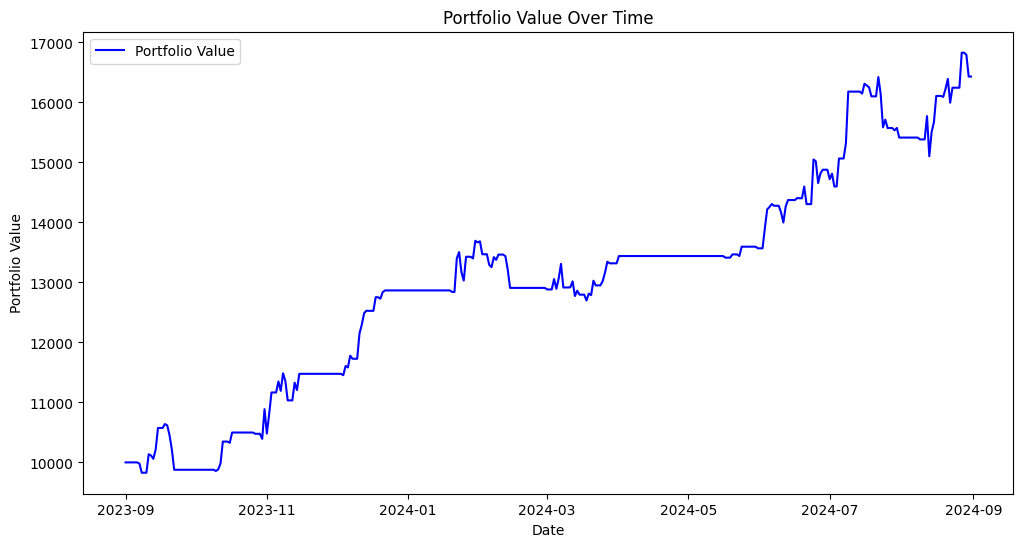

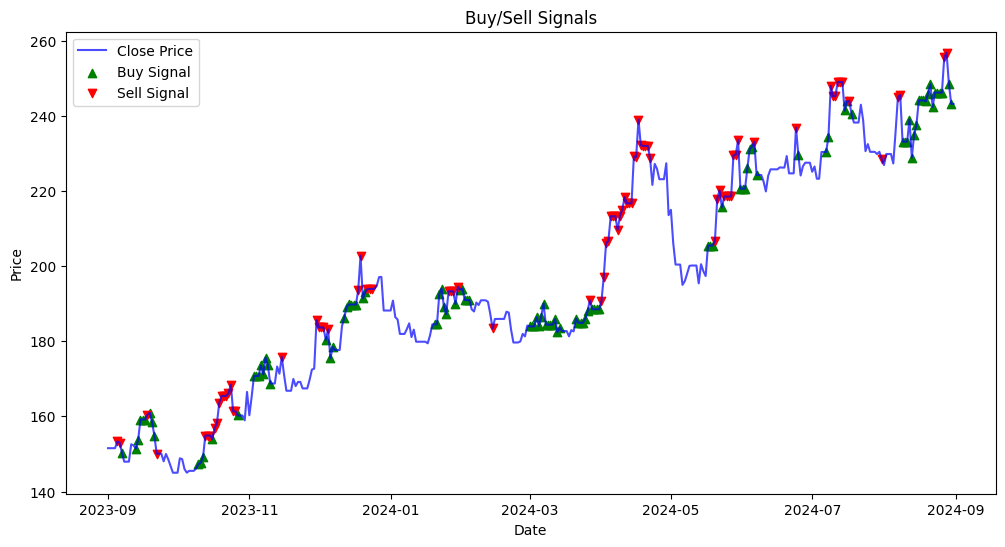

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pyfolio as pf

def calculate_sortino_ratio(returns, risk_free_rate=0.03, target_return=0):
    """Calculate the Sortino ratio."""
    excess_returns = returns - (risk_free_rate / 252)
    downside_deviation = np.sqrt(((returns[returns < target_return] - target_return) ** 2).mean())
    if downside_deviation == 0:
        return np.nan
    sortino_ratio = np.sqrt(252) * (excess_returns.mean() - target_return) / downside_deviation
    return sortino_ratio

def calculate_calmar_ratio(cumulative_return, max_drawdown):
    """Calculate the Calmar ratio."""
    if max_drawdown == 0:
        return np.nan
    return cumulative_return / abs(max_drawdown)

def backtest_combined_strategy(
    data, exit_bars, atr_threshold, temp_threshold, leverage=2, stop_loss=0.05, take_profit=0.10,
    transaction_cost=0.001, slippage=0.001, position_size_fraction=0.15, initial_capital=10000.0
):
    data = data.copy()
    data['Position'] = 0
    data['Signal'] = np.nan
    data['Reason'] = np.nan
    data['Entry_Price'] = np.nan
    data['Shares'] = 0.0

    # Initialize capital and tracking variables
    capital = initial_capital
    shares = 0.0
    position = 0
    entry_price = 0.0

    # Define strategy conditions (adjust as needed)
    trend_follow_condition = (data['macd'] > data['macd_signal'])
    mean_reversion_condition = (data['RSI'] > 70)

    # Entry signals
    data.loc[trend_follow_condition, 'Signal'] = 1  # Buy signal
    data.loc[mean_reversion_condition, 'Signal'] = -1 # Sell signal

    portfolio_values = []

    for i in range(len(data)):
        current_price = data.iloc[i]['Close']
        current_signal = data.iloc[i]['Signal']

        # ----- ENTRY LOGIC -----
        if current_signal == 1 and position == 0:
            # Calculate the amount of money to invest: capital * leverage * fraction
            investment_amount = capital * leverage * position_size_fraction
            entry_price = current_price * (1 + slippage)
            if entry_price > 0:
                shares = investment_amount / entry_price
            else:
                shares = 0.0
            
            # Deduct the entire investment amount and transaction cost from capital
            entry_cost = investment_amount * transaction_cost
            capital = capital - investment_amount - entry_cost
            
            position = 1
            data.at[data.index[i], 'Position'] = position
            data.at[data.index[i], 'Entry_Price'] = entry_price
            data.at[data.index[i], 'Shares'] = shares

        # ----- EXIT OR HOLD LOGIC -----
        elif position == 1:
            exit_price = current_price * (1 - slippage)

            # Stop-loss condition
            if exit_price <= entry_price * (1 - stop_loss):
                exit_value = shares * exit_price
                exit_cost = exit_value * transaction_cost
                # Add proceeds back to capital
                capital = capital + exit_value - exit_cost
                position = 0
                shares = 0
                data.at[data.index[i], 'Position'] = position
                data.at[data.index[i], 'Signal'] = -1
                data.at[data.index[i], 'Reason'] = "Stop Loss Triggered"
                data.at[data.index[i], 'Shares'] = shares

            # Take-profit condition
            elif exit_price >= entry_price * (1 + take_profit):
                exit_value = shares * exit_price
                exit_cost = exit_value * transaction_cost
                capital = capital + exit_value - exit_cost
                position = 0
                shares = 0
                data.at[data.index[i], 'Position'] = position
                data.at[data.index[i], 'Signal'] = -1
                data.at[data.index[i], 'Reason'] = "Take Profit Triggered"
                data.at[data.index[i], 'Shares'] = shares

            # Exit signal from strategy
            elif current_signal == -1:
                exit_value = shares * exit_price
                exit_cost = exit_value * transaction_cost
                capital = capital + exit_value - exit_cost
                position = 0
                shares = 0
                data.at[data.index[i], 'Position'] = position
                data.at[data.index[i], 'Shares'] = shares

            else:
                # Remain in position
                data.at[data.index[i], 'Position'] = position
                data.at[data.index[i], 'Shares'] = shares

        else:
            # No position or no action
            data.at[data.index[i], 'Position'] = position
            data.at[data.index[i], 'Shares'] = shares

        # Calculate daily portfolio value: capital + shares * current_price
        daily_portfolio_value = capital + (shares * current_price)
        portfolio_values.append(daily_portfolio_value)

    data['Portfolio Value'] = portfolio_values

    # Compute daily returns of the strategy from Portfolio Value
    data['Strategy'] = data['Portfolio Value'].pct_change().fillna(0)

    # Performance metrics
    trades = data['Signal'].diff().abs().sum() / 2
    risk_free_rate = 0.03  # 3% annualized

    if data['Strategy'].std() != 0:
        sharpe_ratio = ((data['Strategy'].mean() - (risk_free_rate / 252)) / data['Strategy'].std()) * np.sqrt(252)
    else:
        sharpe_ratio = np.nan

    # Cumulative return as final/initial - 1
    cumulative_return = data['Portfolio Value'].iloc[-1] / data['Portfolio Value'].iloc[0] - 1
    drawdown = (data['Portfolio Value'] / data['Portfolio Value'].cummax() - 1).min()
    sortino_ratio = calculate_sortino_ratio(data['Strategy'].dropna())
    calmar_ratio = calculate_calmar_ratio(cumulative_return, drawdown)

    # Trade log
    trade_log = data[data['Signal'].notna()][['Signal', 'Reason', 'Close']].copy()
    trade_log['Date'] = trade_log.index
    trade_log['Action'] = trade_log['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    trade_log.rename(columns={'Close': 'Price'}, inplace=True)

    # Additional metrics
    winning_trades = data[data['Strategy'] > 0]
    losing_trades = data[data['Strategy'] < 0]
    win_rate = len(winning_trades) / max(len(winning_trades) + len(losing_trades), 1)
    average_gain = winning_trades['Strategy'].mean() if not winning_trades.empty else 0
    average_loss = losing_trades['Strategy'].mean() if not losing_trades.empty else 0

    metrics = {
        'Initial Capital': initial_capital,
        'Final Capital': data['Portfolio Value'].iloc[-1],
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Calmar Ratio': calmar_ratio,
        'Max Drawdown': drawdown,
        'Cumulative Return': cumulative_return,
        'Number of Trades': trades,
        'Number of Days in Market': (data['Position'] != 0).sum(),
        'Win Rate': win_rate,
        'Average Gain': average_gain,
        'Average Loss': average_loss,
    }

    return data, trade_log, metrics

# Example usage:
# Ensure test_data and optimal_result are defined, and test_data has 'Close', 'macd', 'macd_signal', 'RSI'
test_data = test_data.copy()
test_data['Returns'] = test_data['Close'].pct_change().fillna(0)
test_results, trade_log, metrics = backtest_combined_strategy(
    test_data, optimal_result['Exit Bars'], optimal_result['ATR Threshold'], optimal_result['Temp Threshold'],
    leverage=2, stop_loss=0.05, take_profit=0.10, position_size_fraction=0.5, initial_capital=10000.0
)

print("Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

plt.figure(figsize=(12, 6))
plt.plot(test_results['Portfolio Value'], label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# Plot Entry/Exit with Price
plt.figure(figsize=(12, 6))
plt.plot(test_results['Close'], label='Close Price', color='blue', alpha=0.7)
buy_signals = trade_log[trade_log['Action'] == 'Buy']
sell_signals = trade_log[trade_log['Action'] == 'Sell']
plt.scatter(buy_signals['Date'], buy_signals['Price'], label='Buy Signal', color='green', marker='^')
plt.scatter(sell_signals['Date'], sell_signals['Price'], label='Sell Signal', color='red', marker='v')
plt.title('Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [27]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# # import pyfolio as pf

# def calculate_sortino_ratio(returns, risk_free_rate=0.03, target_return=0):
#     """Calculate the Sortino ratio."""
#     excess_returns = returns - (risk_free_rate / 252)
#     downside_deviation = np.sqrt(((returns[returns < target_return] - target_return) ** 2).mean())
#     if downside_deviation == 0:
#         return np.nan
#     sortino_ratio = np.sqrt(252) * (excess_returns.mean() - target_return) / downside_deviation
#     return sortino_ratio

# def calculate_calmar_ratio(cumulative_return, max_drawdown):
#     """Calculate the Calmar ratio."""
#     if max_drawdown == 0:
#         return np.nan
#     return cumulative_return / abs(max_drawdown)

# def backtest_combined_strategy(
#     data, exit_bars, atr_threshold, temp_threshold, leverage=2, stop_loss=0.05, take_profit=0.10,
#     transaction_cost=0.001, slippage=0.001, position_size_fraction=1
# ):
#     data = data.copy()
#     data['Position'] = 0
#     data['Strategy'] = 0
#     data['Signal'] = np.nan
#     data['Reason'] = np.nan
#     data['Entry_Price'] = np.nan  # Track entry price for stop-loss and take-profit

#     # Trend-following strategy: MACD, MA, and RSI conditions
#     trend_follow_condition = (data['macd'] > data['macd_signal'])

#     # Mean-reversion strategy: Weather features and RSI extremes
#     mean_reversion_condition = (data['RSI'] > 70)
    
#     # Entry and exit signals
#     data.loc[trend_follow_condition, 'Signal'] = 1
#     data.loc[trend_follow_condition, 'Reason'] = "Trend Following: MACD > Signal"
#     data.loc[mean_reversion_condition, 'Signal'] = -1
#     data.loc[mean_reversion_condition, 'Reason'] = "Mean Reversion: RSI > 70"

#     position = 0
#     entry_price = 0

#     for i in range(len(data)):
#         if data.iloc[i]['Signal'] == 1 and position == 0:
#             # Instead of fully investing at leverage, invest a fraction of capital * leverage.
#             # For example, if position_size_fraction=0.5 and leverage=2, effective position=1.0 (100% of capital)
#             position = leverage * position_size_fraction
#             entry_price = data.iloc[i]['Close'] * (1 + slippage)  # Adjust for slippage on entry
#             data.iloc[i, data.columns.get_loc('Position')] = position
#             data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
#         elif position > 0:
#             current_price = data.iloc[i]['Close'] * (1 - slippage)  # Adjust for slippage on exit
#             # Stop-loss condition
#             if current_price <= entry_price * (1 - stop_loss):
#                 position = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Signal')] = -1
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Stop Loss Triggered"
#             # Take-profit condition
#             elif current_price >= entry_price * (1 + take_profit):
#                 position = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Signal')] = -1
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Take Profit Triggered"
#             # Exit based on strategy signal
#             elif data.iloc[i]['Signal'] == -1:
#                 position = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#             else:
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#         else:
#             data.iloc[i, data.columns.get_loc('Position')] = position

#     # Forward-fill Entry_Price
#     data['Entry_Price'] = data['Entry_Price'].ffill()

#     data['Position'] = data['Position'].ffill().fillna(0)

#     # Adjust for transaction costs when trades occur
#     # Note: This is a simplistic approach; transaction costs are just a flat fee per trade based on transaction_cost.
#     # If you want a cost proportional to position size, adjust trade_costs accordingly.
#     trade_actions = abs(data['Signal'].diff().fillna(0))
#     trade_costs = trade_actions * transaction_cost

#     # The 'Returns' column should already be in your data as per original code
#     # If not, ensure that 'data' has a 'Returns' column: data['Returns'] = data['Close'].pct_change().fillna(0)
#     data['Strategy'] = (data['Position'].shift(1) * data['Returns']) - trade_costs

#     # Portfolio value assumes starting at 1.0 and grows with Strategy returns
#     data['Portfolio Value'] = (1 + data['Strategy']).cumprod()

#     # Performance metrics
#     trades = trade_actions.sum() / 2  # each Buy->Sell = 2 signals, so /2 gives number of trades
#     risk_free_rate = 0.03  # 3% annualized risk-free rate

#     if data['Strategy'].std() != 0:
#         sharpe_ratio = ((data['Strategy'].mean() - (risk_free_rate / 252)) / data['Strategy'].std()) * np.sqrt(252)
#     else:
#         sharpe_ratio = np.nan

#     # cumulative_return is final_portfolio_value - 1 (in terms of multiples, if final is 2.0 means 100% gain)
#     cumulative_return = data['Portfolio Value'].iloc[-1] - 1  
#     drawdown = (data['Portfolio Value'] / data['Portfolio Value'].cummax() - 1).min()
#     sortino_ratio = calculate_sortino_ratio(data['Strategy'].dropna())
#     calmar_ratio = calculate_calmar_ratio(cumulative_return, drawdown)

#     # Trade log
#     trade_log = data[data['Signal'].notna()][['Signal', 'Reason', 'Close']].copy()
#     trade_log['Date'] = trade_log.index
#     trade_log['Action'] = trade_log['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
#     trade_log.rename(columns={'Close': 'Price'}, inplace=True)

#     # Additional metrics
#     winning_trades = data[data['Strategy'] > 0]
#     losing_trades = data[data['Strategy'] < 0]
#     win_rate = len(winning_trades) / max(len(winning_trades) + len(losing_trades), 1)
#     average_gain = winning_trades['Strategy'].mean() if not winning_trades.empty else 0
#     average_loss = losing_trades['Strategy'].mean() if not losing_trades.empty else 0

#     metrics = {
#         'Sharpe Ratio': sharpe_ratio,
#         'Sortino Ratio': sortino_ratio,
#         'Calmar Ratio': calmar_ratio,
#         'Max Drawdown': drawdown,
#         'Cumulative Return': cumulative_return,
#         'Number of Trades': trades,
#         'Number of Days in Market': (data['Position'] != 0).sum(),
#         'Win Rate': win_rate,
#         'Average Gain': average_gain,
#         'Average Loss': average_loss,
#     }

#     return data, trade_log, metrics

# # Example usage (assuming you have test_data and optimal_result loaded):
# test_data=test_data.copy()
# test_data['Returns'] = test_data['Close'].pct_change().fillna(0)
# test_results, trade_log, metrics = backtest_combined_strategy(
#     test_data, optimal_result['Exit Bars'], optimal_result['ATR Threshold'], optimal_result['Temp Threshold'],
#     leverage=2, stop_loss=0.05, take_profit=0.10, position_size_fraction=0.5
# )

# # print("Metrics:")
# for k, v in metrics.items():
#     print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# plt.figure(figsize=(12, 6))
# plt.plot(test_results['Portfolio Value'], label='Portfolio Value', color='blue')
# plt.title('Portfolio Value Over Time')
# plt.xlabel('Date')
# plt.ylabel('Portfolio Value')
# plt.legend()
# plt.show()
# # Plot Entry/Exit with Price
# plt.figure(figsize=(12, 6))
# plt.plot(test_results['Close'], label='Close Price', color='blue', alpha=0.7)
# buy_signals = trade_log[trade_log['Action'] == 'Buy']
# sell_signals = trade_log[trade_log['Action'] == 'Sell']
# plt.scatter(buy_signals['Date'], buy_signals['Price'], label='Buy Signal', color='green', marker='^')
# plt.scatter(sell_signals['Date'], sell_signals['Price'], label='Sell Signal', color='red', marker='v')
# plt.title('Entry and Exit Points on Price Chart')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()


In [28]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# # import pyfolio as pf


# def calculate_sortino_ratio(returns, risk_free_rate=0.03, target_return=0):
#     """Calculate the Sortino ratio."""
#     excess_returns = returns - (risk_free_rate / 252)
#     downside_deviation = np.sqrt(((returns[returns < target_return] - target_return) ** 2).mean())
#     if downside_deviation == 0:
#         return np.nan
#     sortino_ratio = np.sqrt(252) * (excess_returns.mean() - target_return) / downside_deviation
#     return sortino_ratio


# def calculate_calmar_ratio(cumulative_return, max_drawdown):
#     """Calculate the Calmar ratio."""
#     if max_drawdown == 0:
#         return np.nan
#     return cumulative_return / abs(max_drawdown)


# def backtest_combined_strategy(
#     data, exit_bars, atr_threshold, temp_threshold, leverage=2, stop_loss=0.05, take_profit=0.10,
#     transaction_cost=0.001, slippage=0.001
# ):
#     data = data.copy()
#     data['Position'] = 0
#     data['Strategy'] = 0
#     data['Signal'] = np.nan
#     data['Reason'] = np.nan
#     data['Entry_Price'] = np.nan  # Track entry price for stop-loss and take-profit

#     # Trend-following strategy: MACD, MA, and RSI conditions
#     trend_follow_condition = (data['macd'] > data['macd_signal'])

#     # Mean-reversion strategy: Weather features and RSI extremes
#     mean_reversion_condition = (data['RSI'] > 70)
    
#     # Entry and exit signals
#     data.loc[trend_follow_condition, 'Signal'] = 1
#     data.loc[trend_follow_condition, 'Reason'] = "Trend Following: MACD > Signal"
#     data.loc[mean_reversion_condition, 'Signal'] = -1
#     data.loc[mean_reversion_condition, 'Reason'] = "Mean Reversion: RSI > 70"

#     position = 0
#     entry_price = 0

#     for i in range(len(data)):
#         if data.iloc[i]['Signal'] == 1 and position == 0:
#             # Enter position with leverage
#             position = leverage
#             entry_price = data.iloc[i]['Close'] * (1 + slippage)  # Adjust for slippage on entry
#             data.iloc[i, data.columns.get_loc('Position')] = position
#             data.iloc[i, data.columns.get_loc('Entry_Price')] = entry_price
#         elif position > 0:
#             current_price = data.iloc[i]['Close'] * (1 - slippage)  # Adjust for slippage on exit
#             # Stop-loss condition
#             if current_price <= entry_price * (1 - stop_loss):
#                 position = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Signal')] = -1
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Stop Loss Triggered"
#             # Take-profit condition
#             elif current_price >= entry_price * (1 + take_profit):
#                 position = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#                 data.iloc[i, data.columns.get_loc('Signal')] = -1
#                 data.iloc[i, data.columns.get_loc('Reason')] = "Take Profit Triggered"
#             # Exit based on strategy signal
#             elif data.iloc[i]['Signal'] == -1:
#                 position = 0
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#             else:
#                 data.iloc[i, data.columns.get_loc('Position')] = position
#         else:
#             data.iloc[i, data.columns.get_loc('Position')] = position

#     # Forward-fill Entry_Price
#     data['Entry_Price'] = data['Entry_Price'].ffill()

#     data['Position'] = data['Position'].ffill().fillna(0)

#     # Adjust for transaction costs when trades occur
#     trade_costs = abs(data['Signal'].diff().fillna(0)) * transaction_cost
#     data['Strategy'] = (data['Position'].shift(1) * data['Returns']) - trade_costs

#     # Portfolio value
#     data['Portfolio Value'] = (1 + data['Strategy']).cumprod()

#     # Performance metrics
#     trades = data['Signal'].diff().abs().sum() / 2
#     # Include a risk-free rate (3% annualized)
#     risk_free_rate = 0.03  # 3% annualized risk-free rate

#     sharpe_ratio = (
#         (data['Strategy'].mean() - (risk_free_rate / 252)) / data['Strategy'].std() * np.sqrt(252)
#         if data['Strategy'].std() != 0 else np.nan
#     )

#     cumulative_return = (1 + data['Strategy']).prod() - 1
#     drawdown = (data['Portfolio Value'] / data['Portfolio Value'].cummax() - 1).min()
#     sortino_ratio = calculate_sortino_ratio(data['Strategy'].dropna())
#     calmar_ratio = calculate_calmar_ratio(cumulative_return, drawdown)

#     # Trade log
#     trade_log = data[data['Signal'].notna()][['Signal', 'Reason', 'Close']].copy()
#     trade_log['Date'] = trade_log.index
#     trade_log['Action'] = trade_log['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
#     trade_log.rename(columns={'Close': 'Price'}, inplace=True)

#     # Additional metrics
#     winning_trades = data[data['Strategy'] > 0]
#     losing_trades = data[data['Strategy'] < 0]
#     win_rate = len(winning_trades) / max(len(winning_trades) + len(losing_trades), 1)
#     average_gain = winning_trades['Strategy'].mean() if not winning_trades.empty else 0
#     average_loss = losing_trades['Strategy'].mean() if not losing_trades.empty else 0

#     metrics = {
#         'Sharpe Ratio': sharpe_ratio,
#         'Sortino Ratio': sortino_ratio,
#         'Calmar Ratio': calmar_ratio,
#         'Max Drawdown': drawdown,
#         'Cumulative Return': cumulative_return,
#         'Number of Trades': trades,
#         'Number of Days in Market': (data['Position'] != 0).sum(),
#         'Win Rate': win_rate,
#         'Average Gain': average_gain,
#         'Average Loss': average_loss,
#     }

#     return data, trade_log, metrics


# # Backtest the combined strategy
# test_data = test_data.copy()  # Ensure test_data is preloaded
# test_results, trade_log, metrics = backtest_combined_strategy(
#     test_data, optimal_result['Exit Bars'], optimal_result['ATR Threshold'], optimal_result['Temp Threshold'], leverage=2, stop_loss=0.05, take_profit=0.10
# )

# # Display Metrics
# print("Metrics:")
# for k, v in metrics.items():
#     print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# # Plot Portfolio Value
# plt.figure(figsize=(12, 6))
# plt.plot(test_results['Portfolio Value'], label='Portfolio Value', color='blue')
# plt.title('Portfolio Value Over Time')
# plt.xlabel('Date')
# plt.ylabel('Portfolio Value')
# plt.legend()
# plt.show()

# # Plot Entry/Exit with Price
# plt.figure(figsize=(12, 6))
# plt.plot(test_results['Close'], label='Close Price', color='blue', alpha=0.7)
# buy_signals = trade_log[trade_log['Action'] == 'Buy']
# sell_signals = trade_log[trade_log['Action'] == 'Sell']
# plt.scatter(buy_signals['Date'], buy_signals['Price'], label='Buy Signal', color='green', marker='^')
# plt.scatter(sell_signals['Date'], sell_signals['Price'], label='Sell Signal', color='red', marker='v')
# plt.title('Entry and Exit Points on Price Chart')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

# # Pyfolio Analysis
# returns_series = test_results['Strategy'].dropna()
# # Uncomment below line to generate a full tear sheet
# # pf.create_full_tear_sheet(returns_series)


In [29]:
trade_log

,Signal,Reason,Price,Date,Action
2023-09-05 00:00:00-04:00,-1.0,NaN,153.327,2023-09-05 00:00:00-04:00,Sell
2023-09-06 00:00:00-04:00,-1.0,NaN,153.008,2023-09-06 00:00:00-04:00,Sell
2023-09-07 00:00:00-04:00,1.0,NaN,150.228,2023-09-07 00:00:00-04:00,Buy
2023-09-13 00:00:00-04:00,1.0,NaN,151.428,2023-09-13 00:00:00-04:00,Buy
2023-09-14 00:00:00-04:00,1.0,NaN,153.761,2023-09-14 00:00:00-04:00,Buy
...,...,...,...,...,...
2024-08-26 00:00:00-04:00,1.0,NaN,246.158,2024-08-26 00:00:00-04:00,Buy
2024-08-27 00:00:00-04:00,-1.0,NaN,255.499,2024-08-27 00:00:00-04:00,Sell
2024-08-28 00:00:00-04:00,-1.0,NaN,256.759,2024-08-28 00:00:00-04:00,Sell
2024-08-29 00:00:00-04:00,1.0,NaN,248.531,2024-08-29 00:00:00-04:00,Buy


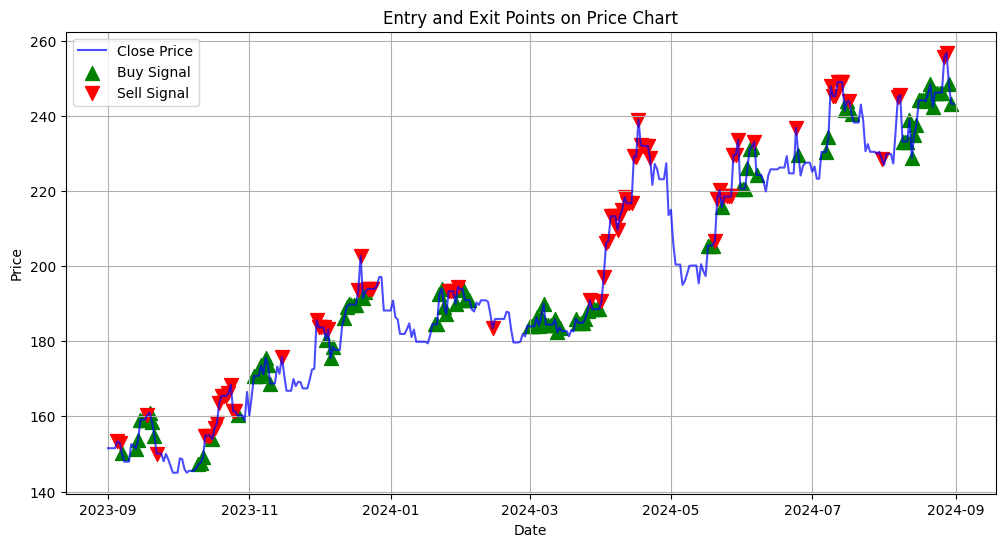

In [30]:
# Extract executed trades (entries and exits)
executed_trades = trade_log[['Date', 'Action', 'Price']]

# Plot price chart with executed trades
plt.figure(figsize=(12, 6))
plt.plot(test_results['Close'], label='Close Price', color='blue', alpha=0.7)

# Plot buy signals
buy_signals = executed_trades[executed_trades['Action'] == 'Buy']
plt.scatter(
    buy_signals['Date'], buy_signals['Price'],
    label='Buy Signal', color='green', marker='^', s=100
)

# Plot sell signals
sell_signals = executed_trades[executed_trades['Action'] == 'Sell']
plt.scatter(
    sell_signals['Date'], sell_signals['Price'],
    label='Sell Signal', color='red', marker='v', s=100
)

plt.title('Entry and Exit Points on Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


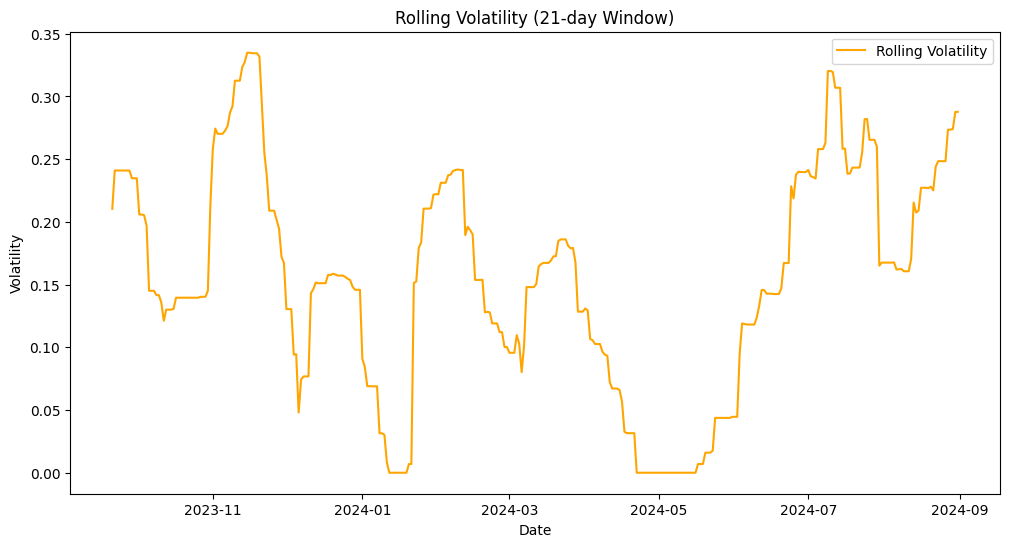

In [31]:
test_results['Rolling_Volatility'] = test_results['Strategy'].rolling(window=21).std() * np.sqrt(252)
plt.figure(figsize=(12, 6))
plt.plot(test_results['Rolling_Volatility'], label='Rolling Volatility', color='orange')
plt.title('Rolling Volatility (21-day Window)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


d:\ANACONDA\envs\rasa\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


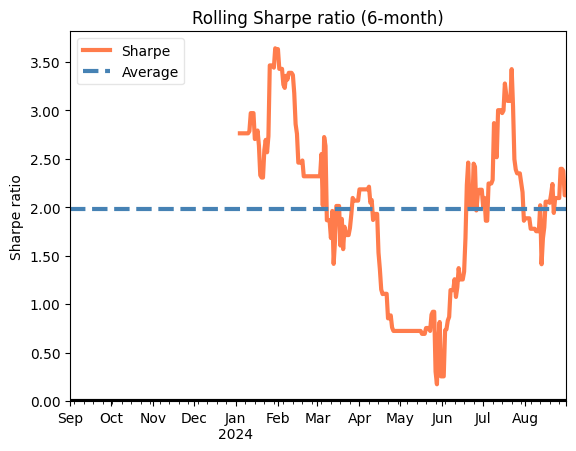

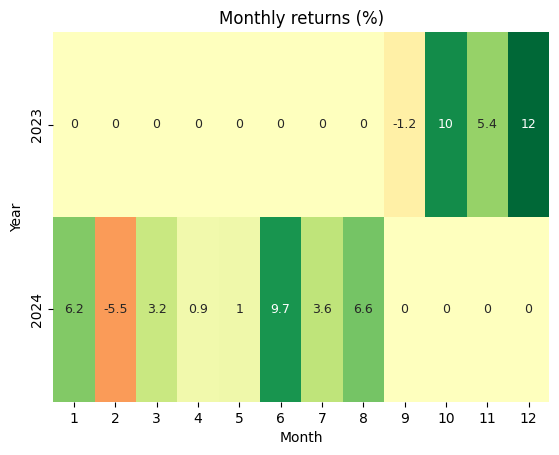

d:\ANACONDA\envs\rasa\lib\site-packages\pyfolio\plotting.py:1303: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(data=[is_returns, is_weekly, is_monthly],
d:\ANACONDA\envs\rasa\lib\site-packages\pyfolio\plotting.py:1319: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Daily', 'Weekly', 'Monthly'])


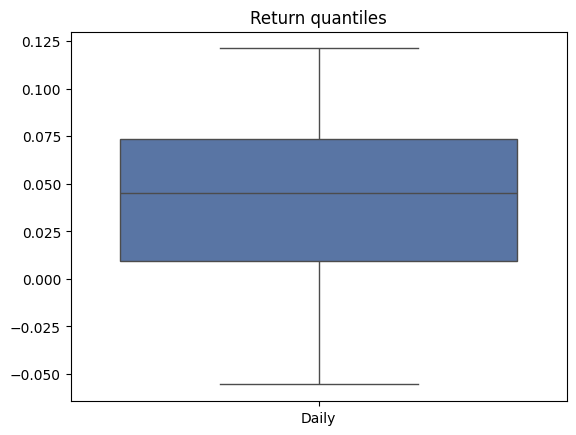

In [32]:
# Ensure returns_series is properly formatted
returns_series = test_results['Strategy'].dropna()
returns_series.index = pd.to_datetime(returns_series.index)  # Ensure datetime index

# Generate individual Pyfolio plots
import pyfolio as pf

# Create Pyfolio Performance Summary
pf.plot_rolling_sharpe(returns_series)
plt.show()

# pf.plot_drawdown_periods(returns_series)
# plt.show()

pf.plot_monthly_returns_heatmap(returns_series)
plt.show()

pf.plot_return_quantiles(returns_series)
plt.show()

# Uncomment this for a full tear sheet (if Pyfolio setup is correct)
# pf.create_full_tear_sheet(returns_series)


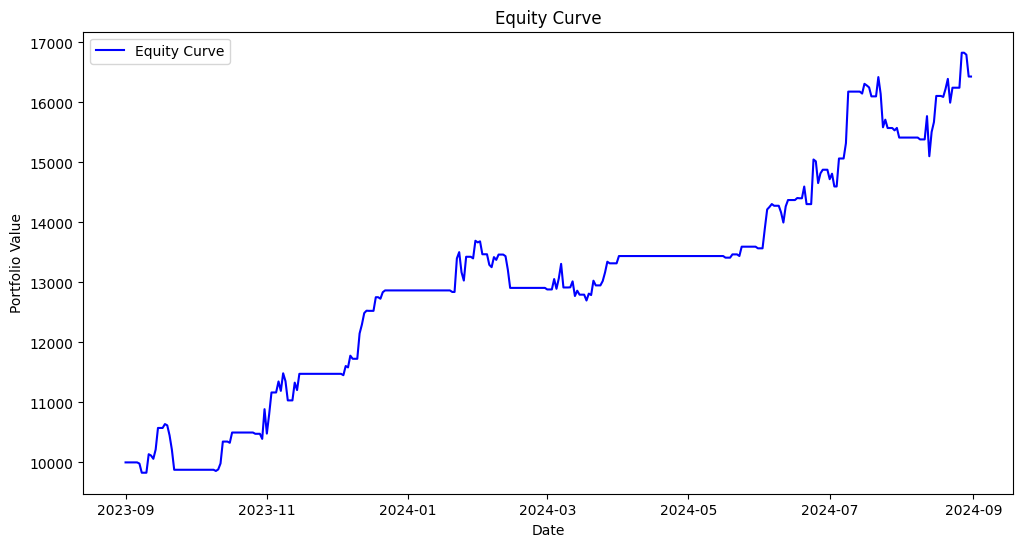

C:\Users\arpan\AppData\Local\Temp\ipykernel_8484\2783107420.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = strategy_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)


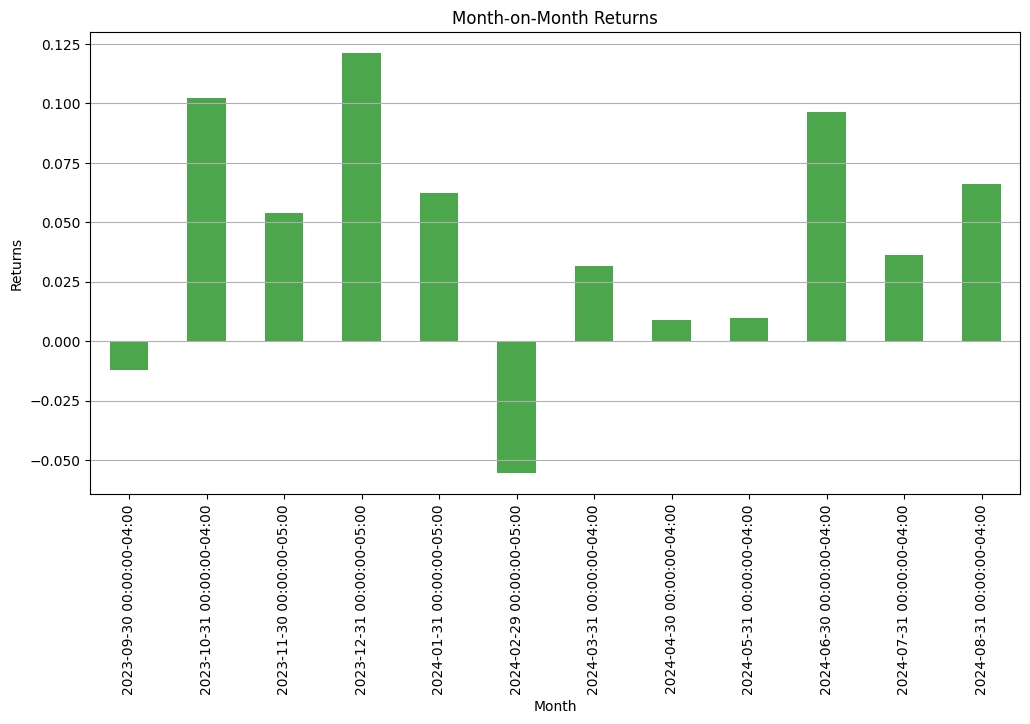

Pyfolio Tear Sheet:


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyfolio as pf

def analyze_strategy(data, strategy_returns, portfolio_value):
    """
    Generates key plots for strategy analysis including:
    - Equity curve
    - Monthly returns
    - Performance summary using Pyfolio
    """

    # Ensure strategy returns are a pandas Series with datetime index
    strategy_returns = pd.Series(strategy_returns, index=data.index, name="Strategy Returns")

    # Equity Curve
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, portfolio_value, label='Equity Curve', color='blue')
    plt.title('Equity Curve')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.show()

    # Month-on-Month Returns
    monthly_returns = strategy_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
    plt.figure(figsize=(12, 6))
    monthly_returns.plot(kind='bar', color='green', alpha=0.7)
    plt.title('Month-on-Month Returns')
    plt.xlabel('Month')
    plt.ylabel('Returns')
    plt.grid(axis='y')
    plt.show()

    # Pyfolio Performance Analysis
    print("Pyfolio Tear Sheet:")
    # pf.create_full_tear_sheet(strategy_returns)

# Ensure you have 'Portfolio Value' and 'Strategy Returns' calculated in your backtest
portfolio_value = test_results['Portfolio Value']
strategy_returns = test_results['Strategy']

# Run the analysis
analyze_strategy(test_results, strategy_returns, portfolio_value)


Buy-and-Hold Metrics:
Cumulative Return: 0.6047
Max Drawdown: -0.1840
Sharpe Ratio: 1.2797

Trading Strategy Metrics:
Cumulative Return: 0.6432
Max Drawdown: -0.0803
Sharpe Ratio: 2.0051


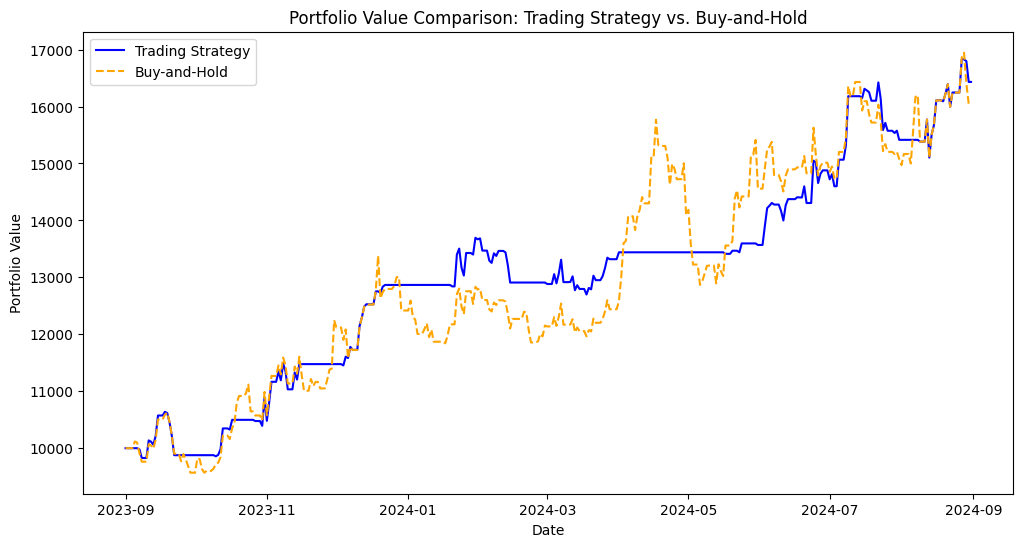

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Sharpe Ratio
def compute_sharpe_ratio(returns, risk_free_rate=0):
    """Calculates Sharpe Ratio for a given returns series."""
    excess_returns = returns - risk_free_rate
    sharpe_ratio = (
        np.sqrt(252) * excess_returns.mean() / excess_returns.std()
        if excess_returns.std() != 0 else np.nan
    )
    return sharpe_ratio

# Buy-and-Hold Strategy Implementation

# Buy-and-Hold Strategy Implementation
def buy_and_hold(data, initial_capital=10000.0):
    """Simulates a buy-and-hold strategy starting with initial_capital."""
    data = data.copy()
    data['Buy_and_Hold'] = (data['Close'] / data['Close'].iloc[0]) * initial_capital
    data['Buy_and_Hold_Returns'] = data['Close'].pct_change()
    return data

# Apply Buy-and-Hold to Test Data
test_data_bh = buy_and_hold(test_data, initial_capital=10000.0)

# Buy-and-Hold Metrics
buy_and_hold_return = test_data_bh['Buy_and_Hold'].iloc[-1] / test_data_bh['Buy_and_Hold'].iloc[0] - 1
buy_and_hold_drawdown = (test_data_bh['Buy_and_Hold'] / test_data_bh['Buy_and_Hold'].cummax() - 1).min()
buy_and_hold_sharpe = compute_sharpe_ratio(test_data_bh['Buy_and_Hold_Returns'].dropna())

# Trading Strategy Metrics
trading_strategy_sharpe = compute_sharpe_ratio(test_results['Strategy'].dropna())

# Print Metrics
print("Buy-and-Hold Metrics:")
print(f"Cumulative Return: {buy_and_hold_return:.4f}")
print(f"Max Drawdown: {buy_and_hold_drawdown:.4f}")
print(f"Sharpe Ratio: {buy_and_hold_sharpe:.4f}")

print("\nTrading Strategy Metrics:")
print(f"Cumulative Return: {metrics['Cumulative Return']:.4f}")
print(f"Max Drawdown: {metrics['Max Drawdown']:.4f}")
print(f"Sharpe Ratio: {trading_strategy_sharpe:.4f}")

# Plot Portfolio Value
plt.figure(figsize=(12, 6))
plt.plot(test_results['Portfolio Value'], label='Trading Strategy', color='blue')
plt.plot(test_data_bh['Buy_and_Hold'], label='Buy-and-Hold', color='orange', linestyle='--')
plt.title('Portfolio Value Comparison: Trading Strategy vs. Buy-and-Hold')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()



In [35]:
import yfinance as yf

# Download S&P GSCI Data
gsci_data = yf.download('^SPGSCI', start='2023-09-01', end='2024-08-31')

# Compute GSCI Returns
gsci_data['Returns'] = gsci_data['Adj Close'].pct_change()


[*********************100%***********************]  1 of 1 completed



GSCI Benchmark Metrics:
Cumulative Return: -0.1039
Max Drawdown: -0.1604
Sharpe Ratio: -57.4878


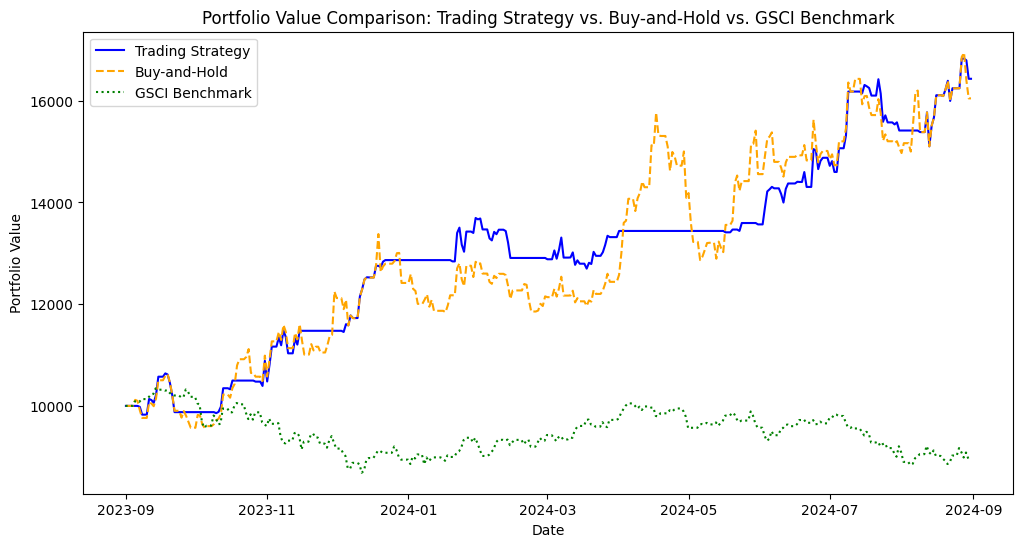

In [36]:
# def gsci_benchmark(test_data, gsci_data):
#     """
#     Simulates the performance of an S&P GSCI benchmark.
    
#     Parameters:
#     - test_data (pd.DataFrame): Test dataset with dates and portfolio values.
#     - gsci_data (pd.DataFrame): GSCI price dataset with 'Date' and 'Close'.
    
#     Returns:
#     - pd.DataFrame: Combined dataset with GSCI benchmark and metrics.
#     """
#     # Ensure both indices are timezone-naive
#     test_data.index = test_data.index.tz_localize(None)
#     gsci_data.index = gsci_data.index.tz_localize(None)
    
#     # Select the 'Close' column (assuming it's correctly named as '^SPGSCI')
#     gsci_data = gsci_data.rename(columns={'Close': 'GSCI_Close'})  # Rename to avoid issues
#     gsci_data = gsci_data[['GSCI_Close']]

#     # Align GSCI data with test data dates
#     gsci_data = gsci_data.reindex(test_data.index, method='ffill')  # Forward fill missing dates

#     # Compute GSCI benchmark portfolio value and returns
#     gsci_data['GSCI_Benchmark'] = gsci_data['GSCI_Close'] / gsci_data['GSCI_Close'].iloc[0]  # Normalize portfolio value
#     gsci_data['GSCI_Returns'] = gsci_data['GSCI_Close'].pct_change()  # Daily returns for Sharpe

#     return gsci_data
def gsci_benchmark(test_data, gsci_data, initial_capital=10000.0):
    """
    Simulates the performance of an S&P GSCI benchmark starting with initial_capital.
    
    Parameters:
    - test_data (pd.DataFrame): Test dataset with dates and portfolio values.
    - gsci_data (pd.DataFrame): GSCI price dataset with 'Date' and 'Close'.
    - initial_capital (float): The starting capital for the benchmark (default 10,000).
    
    Returns:
    - pd.DataFrame: Combined dataset with GSCI benchmark and metrics.
    """
    # Ensure both indices are timezone-naive
    test_data.index = test_data.index.tz_localize(None)
    gsci_data.index = gsci_data.index.tz_localize(None)
    
    # Rename Close column for clarity
    gsci_data = gsci_data.rename(columns={'Close': 'GSCI_Close'})  
    gsci_data = gsci_data[['GSCI_Close']]

    # Align GSCI data with test_data dates
    gsci_data = gsci_data.reindex(test_data.index, method='ffill')  # Forward fill missing dates

    # Compute GSCI benchmark portfolio value and returns
    # Normalize so that initial value = initial_capital
    gsci_data['GSCI_Benchmark'] = (gsci_data['GSCI_Close'] / gsci_data['GSCI_Close'].iloc[0]) * initial_capital
    gsci_data['GSCI_Returns'] = gsci_data['GSCI_Close'].pct_change()  # Daily returns

    return gsci_data

# Apply GSCI Benchmark
gsci_benchmark_data = gsci_benchmark(test_data, gsci_data, initial_capital=10000.0)

# GSCI Benchmark Metrics
gsci_return = (gsci_benchmark_data['GSCI_Benchmark'].iloc[-1] / gsci_benchmark_data['GSCI_Benchmark'].iloc[0]) - 1
gsci_drawdown = (gsci_benchmark_data['GSCI_Benchmark'] / gsci_benchmark_data['GSCI_Benchmark'].cummax() - 1).min()
gsci_sharpe = compute_sharpe_ratio(gsci_benchmark_data['GSCI_Returns'].dropna(), risk_free_rate=0.03)

# Print GSCI Metrics
print("\nGSCI Benchmark Metrics:")
print(f"Cumulative Return: {gsci_return:.4f}")
print(f"Max Drawdown: {gsci_drawdown:.4f}")
print(f"Sharpe Ratio: {gsci_sharpe:.4f}")

# Plot Comparison of Portfolio Value, Buy-and-Hold, and GSCI
plt.figure(figsize=(12, 6))
plt.plot(test_results['Portfolio Value'], label='Trading Strategy', color='blue')
plt.plot(test_data_bh['Buy_and_Hold'], label='Buy-and-Hold', color='orange', linestyle='--')
plt.plot(gsci_benchmark_data['GSCI_Benchmark'], label='GSCI Benchmark', color='green', linestyle=':')
plt.title('Portfolio Value Comparison: Trading Strategy vs. Buy-and-Hold vs. GSCI Benchmark')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


# # Apply GSCI Benchmark
# gsci_benchmark_data = gsci_benchmark(test_data, gsci_data)

# # GSCI Benchmark Metrics
# gsci_return = gsci_benchmark_data['GSCI_Benchmark'].iloc[-1] - 1  # Cumulative return
# gsci_drawdown = (gsci_benchmark_data['GSCI_Benchmark'] / gsci_benchmark_data['GSCI_Benchmark'].cummax() - 1).min()
# gsci_sharpe = compute_sharpe_ratio(gsci_benchmark_data['GSCI_Returns'].dropna(), risk_free_rate=0.03)

# # Print GSCI Metrics
# print("\nGSCI Benchmark Metrics:")
# print(f"Cumulative Return: {gsci_return:.4f}")
# print(f"Max Drawdown: {gsci_drawdown:.4f}")
# print(f"Sharpe Ratio: {gsci_sharpe:.4f}")

# # Plot Comparison of Portfolio Value, Buy-and-Hold, and GSCI
# plt.figure(figsize=(12, 6))
# plt.plot(test_results['Portfolio Value'], label='Trading Strategy', color='blue')
# plt.plot(test_data_bh['Buy_and_Hold'], label='Buy-and-Hold', color='orange', linestyle='--')
# plt.plot(gsci_benchmark_data['GSCI_Benchmark'], label='GSCI Benchmark', color='green', linestyle=':')
# plt.title('Portfolio Value Comparison: Trading Strategy vs. Buy-and-Hold vs. GSCI Benchmark')
# plt.xlabel('Date')
# plt.ylabel('Portfolio Value (Normalized)')
# plt.legend()
# plt.show()
